<a href="https://colab.research.google.com/github/VikkiChitte/Data-Analysis/blob/main/ML_Regresion_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Problem Statement: Use regression analysis to predict the price of a property

## **Attribute Information:** 
* Id : Serial number 

* Dwell_Type : Identifies the type of dwelling involved in the sale

* Zone_Class : Identifies the general zoning classification of the sale

* LotFrontage: Linear feet of street-connected to the property 

* LotArea: Lot size is the lot or parcel side where it adjoins a street, boulevard or access way 

* Road_Type: Type of road access to the property

* Alley : Type of alley access to the property

* Property_Shape : General shape of the property

* LandContour : Flatness of the property

* Utilities : Type of utilities available

* LotConfig : Lot configuration

* LandSlope : Slope of property

* Neighborhood : Physical locations within Ames city limits

* Condition1 : Proximity to various conditions

* Condition2 : Proximity to various conditions (if more than one is present)

* Dwelling_Type : Type of dwelling

* HouseStyle : Style of dwelling

* OverallQual : Rates the overall material and finish of the house

* OverallCond : Rates the overall condition of the house

* YearBuilt : Original construction date

* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

* RoofStyle: Type of roof

* RoofMatl : Roof material

* Exterior1st : Exterior covering on the house

* Exterior2nd : Exterior covering on the house (if more than one material)

* MasVnrType : Masonry veneer type

* MasVnrArea : Masonry veneer area in square feet

* ExterQual: Evaluates the quality of the material on the exterior

* ExterCond : Evaluates the present condition of the material on the exterior

* Foundation: Type of foundation

* BsmtQual : Evaluates the height of the basement

* BsmtCond : Evaluates the general condition of the basement

* BsmtExposure : Refers to walkout or garden level walls

* BsmtFinType1 : Rating of basement finished area

* BsmtFinSF1 : Type 1 finished square feet

* BsmtFinType2 : Rating of basement finished area (if multiple types)

* BsmtFinSF2: Type 2 finished square feet 

* BsmtUnfSF: Unfinished square feet of the basement area 

* TotalBsmtSF: Total square feet of the basement area 

* Heating: Type of heating

* HeatingQC: Heating quality and condition

* CentralAir: Central air conditioning

* Electrical: Electrical system

* 1stFlrSF: First Floor square feet 

* 2ndFlrSF: Second floor square feet 

* LowQualFinSF: Low quality finished square feet (all floors)

* GrLivArea: Above grade (ground) living area square feet

* BsmtFullBath: Basement full bathrooms

* BsmtHalfBath: Basement half bathrooms

* FullBath: Full bathrooms above grade

* HalfBath: Half baths above grade 

* Bedroom: Bedrooms above grade (does NOT include basement bedrooms) 

* Kitchen: Kitchens above grade 

* KitchenQual: Kitchen quality

* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) 

* Functional: Home functionality (Assume typical unless deductions are warranted)

* Fireplaces: Number of fireplaces 

* FireplaceQu: Fireplace quality

* GarageType: Garage location

* GarageYrBlt: Year garage was built 

* GarageFinish: Interior finish of the garage

* GarageCars: Size of garage in car capacity 

* GarageArea: Size of garage in square feet 

* GarageQual: Garage quality

* GarageCond: Garage condition

* PavedDrive: Paved driveway

* WoodDeckSF: Wood deck area in square feet 

* OpenPorchSF: Open porch area in square feet 

* EnclosedPorch: Enclosed porch area in square feet 

* 3SsnPorch: Three season porch area in square feet

* ScreenPorch: Screen porch area in square feet

* PoolArea: Pool area in square feet 

* PoolQC: Pool quality

* Fence: Fence quality

* MiscFeature: Miscellaneous feature not covered in other categories

* MiscVal: Value of miscellaneous feature

* MoSold: Month Sold (MM) 

* YrSold: Year Sold (YYYY)

* SaleType: Type of sale

* SaleCondition: Condition of sale

* Property_Sale_Price : Price of the house




In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
%cd '/gdrive/My Drive/Imarticus/Houseprices/'

/gdrive/My Drive/Imarticus/Houseprices


In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
House_Price = pd.read_csv('HousePrices.csv')

In [6]:
a=House_Price.copy()

In [7]:
a

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,RRNn,Norm,1Fam,2Story,8,4,1936,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,298.0,Gd,TA,PConc,Gd,TA,No,ALQ,772,Unf,0,220,992,GasA,...,Y,SBrkr,1022,1038,0,2060,1,0,2,1,3,1,Gd,8,Typ,1,TA,BuiltIn,1999.0,RFn,2,390,TA,TA,Y,0,0,0,168,0,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63.0,7711,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,6,9,1936,1977,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,1440,Unf,0,0,1440,GasA,...,Y,SBrkr,1440,0,0,1440,2,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,321,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,4,6,1983,1996,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,1632,1632,GasA,...,Y,SBrkr,1632,0,0,1632,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,2017.0,Unf,2,576,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,9,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,G

In [8]:
a.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
a.tail()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
2068,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,RRNn,Norm,1Fam,2Story,8,4,1936,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,298.0,Gd,TA,PConc,Gd,TA,No,ALQ,772,Unf,0,220,992,GasA,...,Y,SBrkr,1022,1038,0,2060,1,0,2,1,3,1,Gd,8,Typ,1,TA,BuiltIn,1999.0,RFn,2,390,TA,TA,Y,0,0,0,168,0,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63.0,7711,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,6,9,1936,1977,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,1440,Unf,0,0,1440,GasA,...,Y,SBrkr,1440,0,0,1440,2,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,321,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,4,6,1983,1996,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,1632,1632,GasA,...,Y,SBrkr,1632,0,0,1632,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,2017.0,Unf,2,576,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,9,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111,Rec,354,354,819,GasA,...,Y,FuseA,1344,0,0,1344,0,1,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2,525,TA,TA,Y,0,118,0,0,233,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
2072,946,50,RM,98.0,8820,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,9,9,1890,1996,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,1088,Unf,0,0,1088,GasA,...,Y,SBrkr,1188,561,120,1869,0,0,1,0,2,1,TA,7,Typ,0,NaN,Detchd,1963.0,Unf,2,456,TA,TA,Y,48,0,244,0,0,0,NaN,MnWw,NaN,0,9,2009,WD,Normal,124900


In [10]:
a.shape

(2073, 81)

In [11]:
a.size

167913

In [12]:
a.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [13]:
len(a)

2073

In [14]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

## **Observations :**


1.   There are 2073 rows and 81 columns
2.   There are 3-float columns, 35-integer columns and 43-object columns
3.   





note : in order to remove 






Here we are looking at the columns with missing values only and finding the percentage of that columns with missing values 

In [15]:
a[a.columns[a.isnull().any()]].isnull().sum()/len(a)*100

LotFrontage     15.436565
Alley           93.777135
MasVnrType       0.675350
MasVnrArea       0.675350
BsmtQual         2.846117
BsmtCond         2.846117
BsmtExposure     2.942595
BsmtFinType1     2.846117
BsmtFinType2     2.894356
Electrical       0.048239
FireplaceQu     47.660396
GarageType       5.451037
GarageYrBlt      5.451037
GarageFinish     5.451037
GarageQual       5.451037
GarageCond       5.451037
PoolQC          99.614086
Fence           80.511336
MiscFeature     96.140859
dtype: float64

In [16]:
a.shape

(2073, 81)

We are dropping the columns with missing data > 40% in them.

Here as we are not using shallow copy so the dropped columns in dropa also gets dropped in dataset a

In [17]:
# This is also a correct method but it goes to a business report so it is better to drop columns with name:
a.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis =1, inplace=True)
# dropa = a.columns[a.isnull().any()]  # Here dropa is a dataset where columns with null are present 

In [18]:
# for column in dropa:
#     if a[column].isnull().sum()*100.0/len(a) > 40:
#         a.drop(column,1, inplace=True)

Lets us fix missing values

In [19]:
# we will replace missing values in every column with its median
medianfiller = lambda x: x.fillna(x.median())
numeric_columns = a.select_dtypes(include = np.number).columns.tolist()
a[numeric_columns] = a[numeric_columns].apply(medianfiller,axis = 0)

In [20]:
# To check if the missing values has been filled or not
a[a.columns[a.isnull().any()]].isnull().sum() # The columns below are categorical data, the columns with 
#float has been filled

MasVnrType       14
BsmtQual         59
BsmtCond         59
BsmtExposure     61
BsmtFinType1     59
BsmtFinType2     60
Electrical        1
GarageType      113
GarageFinish    113
GarageQual      113
GarageCond      113
dtype: int64

In [21]:

# To check the number of unique values in that column i.e Pune, Mumbai,Pune,Pune it will show only Pune and Mumbai
a.nunique()

Id                     1820
Dwell_Type               18
Zone_Class                5
LotFrontage             110
LotArea                1367
                       ... 
MoSold                   12
YrSold                    5
SaleType                  9
SaleCondition             6
Property_Sale_Price     663
Length: 76, dtype: int64

In [22]:
# To find the value count of categorical data in categorical data columns
categorical_column = a.select_dtypes(include = object).columns.tolist()

Here we find individual categorical value with evey individual 

In [23]:
for i in categorical_column:
    print(a[i].value_counts())

RL         1611
RM          324
FV          102
RH           22
C (all)      14
Name: Zone_Class, dtype: int64
Pave    2063
Grvl      10
Name: Road_Type, dtype: int64
Reg    1300
IR1     698
IR2      60
IR3      15
Name: Property_Shape, dtype: int64
Lvl    1854
Bnk      92
HLS      76
Low      51
Name: LandContour, dtype: int64
AllPub    2070
NoSeWa       3
Name: Utilities, dtype: int64
Inside     1481
Corner      386
CulDSac     137
FR2          65
FR3           4
Name: LotConfig, dtype: int64
Gtl    1958
Mod     101
Sev      14
Name: LandSlope, dtype: int64
NAmes      317
CollgCr    217
OldTown    156
Edwards    138
Somerst    123
Gilbert    119
Sawyer     108
NWAmes     105
NridgHt     99
SawyerW     93
BrkSide     80
Mitchel     78
Crawfor     72
NoRidge     65
Timber      53
IDOTRR      51
ClearCr     33
StoneBr     32
SWISU       31
Blmngtn     27
MeadowV     24
NPkVill     17
BrDale      17
Veenker     15
Blueste      3
Name: Neighborhood, dtype: int64
Norm      1794
Feedr      

## Here as c and rl in zonal column are very less, so we consideer it as less significient so we create a dummy and we merge the least vales with the smallest of that column value


Cleaning the categorical Data column

In [24]:
a['Zone_Class'].replace({'RH':'FV','C (all)':'FV'},inplace=True) 

In [25]:
a['Zone_Class'].value_counts()

RL    1611
RM     324
FV     138
Name: Zone_Class, dtype: int64

In [26]:
a['Property_Shape'].replace({'IR3':'IR2'},inplace = True)
a['Property_Shape'].value_counts()

Reg    1300
IR1     698
IR2      75
Name: Property_Shape, dtype: int64

In [27]:
a['LotConfig'].replace({'FR3':'FR2'},inplace = True)
a['LotConfig'].value_counts()

Inside     1481
Corner      386
CulDSac     137
FR2          69
Name: LotConfig, dtype: int64

In [28]:

a['LandSlope'].replace({'Sev':'Mod'},inplace = True)
a['LandSlope'].value_counts()

Gtl    1958
Mod     115
Name: LandSlope, dtype: int64

In [29]:
b= a.groupby('Neighborhood')['Property_Sale_Price'].mean().sort_values()
b

Neighborhood
MeadowV     96362.500000
IDOTRR      99941.215686
BrDale     105288.235294
OldTown    123362.557692
BrkSide    125134.687500
Edwards    130126.014493
Blueste    133000.000000
Sawyer     141572.879630
SWISU      143701.096774
NPkVill    144220.588235
NAmes      144835.624606
Mitchel    155801.846154
SawyerW    185179.118280
Blmngtn    190835.666667
Gilbert    191136.394958
NWAmes     191622.476190
CollgCr    199701.599078
Crawfor    211883.486111
ClearCr    216852.484848
Somerst    225509.211382
Timber     236658.358491
Veenker    270100.000000
StoneBr    310923.625000
NoRidge    320578.984615
NridgHt    322889.333333
Name: Property_Sale_Price, dtype: float64

In [30]:
bin_label = ['MeadowV','Edwards','NAmes','NWAmes','Timber']
pd.Neighborhood= pd.qcut(b,q=5,labels = bin_label).value_counts()

In [31]:
a['Condition1'].replace({'RRNe':'RRNn'},inplace = True)
a['Condition1'].value_counts()

Norm      1794
Feedr      112
Artery      62
RRAn        39
PosN        24
RRAe        15
RRNn        14
PosA        13
Name: Condition1, dtype: int64

In [32]:
a['Condition2'].replace({'RRAn':'Feedr','RRNn':'Feedr','PosN':'Feedr','Artery':'Feedr','PosA':'Feedr','RRAe':'Feedr'},inplace=True)
a['Condition2'].value_counts()

Norm     2054
Feedr      19
Name: Condition2, dtype: int64

In [33]:
a['RoofStyle'].replace({'Shed':'Gambrel','Mansard':'Gambrel'},inplace=True)
a['RoofStyle'].value_counts()

Gable      1606
Hip         420
Gambrel      28
Flat         19
Name: RoofStyle, dtype: int64

In [34]:
a['RoofMatl'].replace({'ClyTile':'WdShake','Metal':'WdShake','Membran':'WdShake','Roll':"WdShake"},inplace=True)
a['RoofMatl'].value_counts()

CompShg    2036
Tar&Grv      17
WdShngl      10
WdShake      10
Name: RoofMatl, dtype: int64

In [35]:
a['Exterior1st'].replace({'Stone':'AsbShng','BrkComm':'AsbShng','AsphShn':'AsbShng','CBlock':'AsbShng','ImStucc':'AsbShng'},inplace=True)
a['Exterior1st'].value_counts()

VinylSd    750
HdBoard    316
MetalSd    308
Wd Sdng    285
Plywood    156
CemntBd     87
BrkFace     72
WdShing     37
AsbShng     34
Stucco      28
Name: Exterior1st, dtype: int64

In [36]:
a['Exterior2nd'].replace({'Stone':'Brk Cmn','AsphShn':'Brk Cmn','Other':'Brk Cmn','CBlock':'Brk Cmn'},inplace=True)
a['Exterior2nd'].value_counts()

VinylSd    729
MetalSd    299
HdBoard    292
Wd Sdng    277
Plywood    205
CmentBd     85
Wd Shng     55
BrkFace     35
Stucco      29
AsbShng     27
Brk Cmn     26
ImStucc     14
Name: Exterior2nd, dtype: int64

In [37]:
a['MasVnrType'].replace({'BrkCmn':'Stone'},inplace=True)
a['MasVnrType'].value_counts()

None       1233
BrkFace     620
Stone       206
Name: MasVnrType, dtype: int64

In [38]:
a['ExterQual'].replace({'Fa':'Ex'},inplace=True)
a['ExterQual'].value_counts()

TA    1272
Gd     706
Ex      95
Name: ExterQual, dtype: int64

In [39]:
a['ExterCond'].replace({'Po':'Fa','Ex':'Fa'},inplace=True)
a['ExterCond'].value_counts()

TA    1815
Gd     219
Fa      39
Name: ExterCond, dtype: int64

In [40]:
a['Foundation'].replace({'Wood':'Slab','Stone':'Slab'},inplace = True)
a['Foundation'].value_counts()

PConc     928
CBlock    901
BrkTil    191
Slab       53
Name: Foundation, dtype: int64

In [41]:
a['BsmtQual'].replace({'Fa':'Ex'},inplace = True)
a['BsmtQual'].value_counts()

Gd    904
TA    891
Ex    219
Name: BsmtQual, dtype: int64

In [42]:
a['Heating'].replace({'OthW':'Garv','Floor':'Garv','Wall':'Garv'},inplace=True)
a['Heating'].value_counts()

GasA    2025
GasW      25
Garv      13
Grav      10
Name: Heating, dtype: int64

In [43]:
a['Electrical'].replace({'Mix':'FuseF','FuseP':'FuseF'},inplace=True)
a['Electrical'].value_counts()

SBrkr    1901
FuseA     127
FuseF      44
Name: Electrical, dtype: int64

In [44]:
a['KitchenQual'].replace({'Fa':'Ex'},inplace=True)
a['KitchenQual'].value_counts()

TA    1043
Gd     838
Ex     192
Name: KitchenQual, dtype: int64

In [45]:
a['Functional'].replace({'Sev':'Maj1','Maj2':'Maj1'},inplace=True)
a['Functional'].value_counts()

Typ     1937
Min1      49
Min2      47
Maj1      22
Mod       18
Name: Functional, dtype: int64

In [46]:
a['GarageQual'].replace({'Po':'Gd','Ex':'Gd'},inplace=True)
a['GarageQual'].value_counts()

TA    1870
Fa      65
Gd      25
Name: GarageQual, dtype: int64

In [47]:
a['PavedDrive'].replace({'P':'N'},inplace=True)
a['PavedDrive'].value_counts()

Y    1913
N     160
Name: PavedDrive, dtype: int64

In [48]:
a['SaleType'].replace({'Con':'ConLD','Oth':'ConLD','CWD':'ConLD','ConLw':'ConLD','ConLI':'ConLD'},inplace=True)
a['SaleType'].value_counts()

WD       1797
New       171
COD        68
ConLD      37
Name: SaleType, dtype: int64

In [49]:
for i in categorical_column:
    print(a[i].value_counts())

RL    1611
RM     324
FV     138
Name: Zone_Class, dtype: int64
Pave    2063
Grvl      10
Name: Road_Type, dtype: int64
Reg    1300
IR1     698
IR2      75
Name: Property_Shape, dtype: int64
Lvl    1854
Bnk      92
HLS      76
Low      51
Name: LandContour, dtype: int64
AllPub    2070
NoSeWa       3
Name: Utilities, dtype: int64
Inside     1481
Corner      386
CulDSac     137
FR2          69
Name: LotConfig, dtype: int64
Gtl    1958
Mod     115
Name: LandSlope, dtype: int64
NAmes      317
CollgCr    217
OldTown    156
Edwards    138
Somerst    123
Gilbert    119
Sawyer     108
NWAmes     105
NridgHt     99
SawyerW     93
BrkSide     80
Mitchel     78
Crawfor     72
NoRidge     65
Timber      53
IDOTRR      51
ClearCr     33
StoneBr     32
SWISU       31
Blmngtn     27
MeadowV     24
NPkVill     17
BrDale      17
Veenker     15
Blueste      3
Name: Neighborhood, dtype: int64
Norm      1794
Feedr      112
Artery      62
RRAn        39
PosN        24
RRAe        15
RRNn        14
PosA    

In [50]:
b= a.groupby('Neighborhood')['Property_Sale_Price'].mean().sort_values()
b

Neighborhood
MeadowV     96362.500000
IDOTRR      99941.215686
BrDale     105288.235294
OldTown    123362.557692
BrkSide    125134.687500
Edwards    130126.014493
Blueste    133000.000000
Sawyer     141572.879630
SWISU      143701.096774
NPkVill    144220.588235
NAmes      144835.624606
Mitchel    155801.846154
SawyerW    185179.118280
Blmngtn    190835.666667
Gilbert    191136.394958
NWAmes     191622.476190
CollgCr    199701.599078
Crawfor    211883.486111
ClearCr    216852.484848
Somerst    225509.211382
Timber     236658.358491
Veenker    270100.000000
StoneBr    310923.625000
NoRidge    320578.984615
NridgHt    322889.333333
Name: Property_Sale_Price, dtype: float64

# Summary
* As we see the data when we use describe shows big float
values to get a better understanding we cut it down to 3 decimal
places by performing the above code

* a.describe()-This command will get us count,std,mean,25%,50%,75%,max of the numerical data in our dataset

*a,describe(include = 'object') -This command will give us the count 

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
a.describe(include = 'all')

object datatypes

In [52]:
a.describe(include = 'object').T

,count,unique,top,freq
Zone_Class,2073,3,RL,1611
Road_Type,2073,2,Pave,2063
Property_Shape,2073,3,Reg,1300
LandContour,2073,4,Lvl,1854
Utilities,2073,2,AllPub,2070
LotConfig,2073,4,Inside,1481
LandSlope,2073,2,Gtl,1958
Neighborhood,2073,25,NAmes,317
Condition1,2073,8,Norm,1794
Condition2,2073,2,Norm,2054


In [53]:
a.describe(include = 'float').T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,2073.000,71.739,25.746,21.000,60.000,70.000,80.000,313.000
MasVnrArea,2073.000,101.188,178.758,0.000,0.000,0.000,160.000,1600.000
GarageYrBlt,2073.000,1980.614,23.504,1906.000,1964.000,1984.000,2003.000,2019.000


In [54]:
a.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
Id,2073.000,916.132,493.015,1.000,519.000,932.000,1302.000,1820.000
Dwell_Type,2073.000,60.556,159.925,20.000,20.000,50.000,70.000,7080.000
LotFrontage,2073.000,71.739,25.746,21.000,60.000,70.000,80.000,313.000
LotArea,2073.000,10717.853,9215.982,1300.000,7620.000,9492.000,11601.000,215245.000
OverallQual,2073.000,6.233,1.517,1.000,5.000,6.000,7.000,10.000
OverallCond,2073.000,5.835,1.360,1.000,5.000,5.000,7.000,9.000
YearBuilt,2073.000,1969.446,30.223,1872.000,1950.000,1971.000,1999.000,2010.000
YearRemodAdd,2073.000,1986.617,20.433,1950.000,1970.000,1995.000,2004.000,2023.000
MasVnrArea,2073.000,101.188,178.758,0.000,0.000,0.000,160.000,1600.000
BsmtFinSF1,2073.000,437.949,448.051,0.000,0.000,381.000,708.000,5644.000


In [55]:
# While doing uni-variance analysis  of numerical variables we want to study their central tendency
#and dispersion
#let us write a function that will help us create boxplot and histogram for any input numerical variables.
#This Function takes the numerical column as the input and returns the boxplots
#and histogram fot the variable.
#let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
  """boxplot and histogram combined
  feature: 1-d feature array
  figsize: size of fig (default (9,8))
  bins: number of bins (default None / auto)
  """
  sns.set(font_scale=2) # setting the font scale of the seaborn
  f2,(ax_box2, ax_hist2) = plt.subplots(nrows = 2, #Number of rows of the subplot grid = 2
                                        sharex = True, # x-axis will be shared among all subplots
                                        gridspec_kw = {'height_ratios':(0.25, 0.75)},
                                        figsize = figsize) # creating the 2 subplots
  sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') #boxplot will be created and a star will indicate the mean
  sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2)
  ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
  ax_hist2.axvline(np.median(feature), color='black', linestyle='--')# Add median to the histogram                                      

Here the data is clustered at one side so , we will try to normalize it by using the log transformation

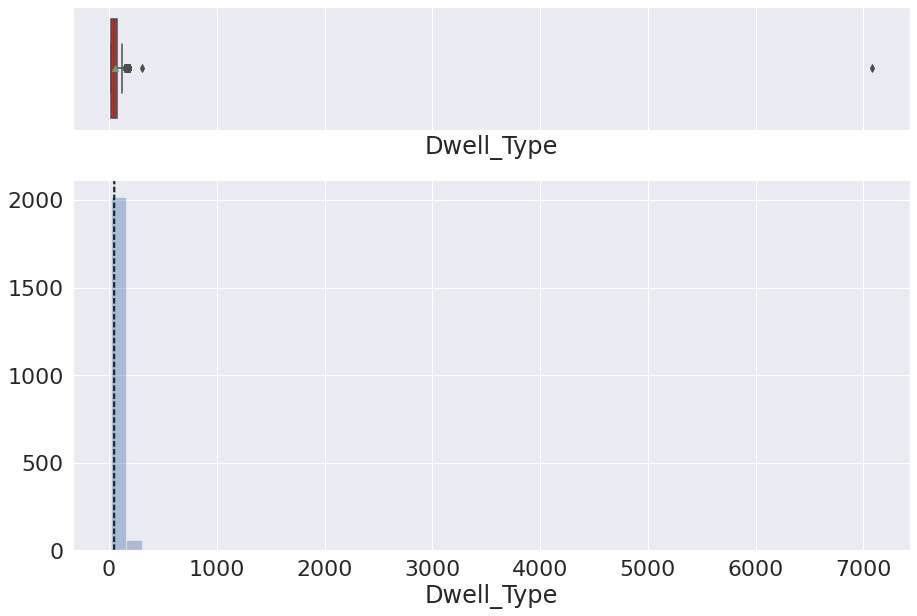

In [56]:
histogram_boxplot(a.Dwell_Type)

here, the data of LotFrontage is distributed .BCZ its mean, mode and median are near to each other as it may follow the normal distribution. The most of the observation lie between the 60 to 75 and most of the outliers lie above at the mass observation.

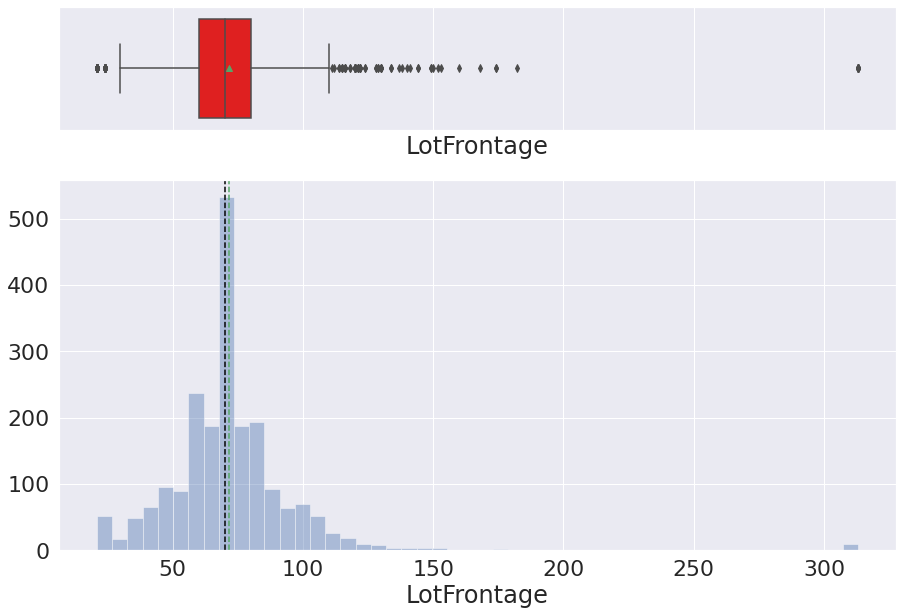

In [57]:
histogram_boxplot(a.LotFrontage)

*

The data is clustered at the left side so we will try to normalize the data using log transformation

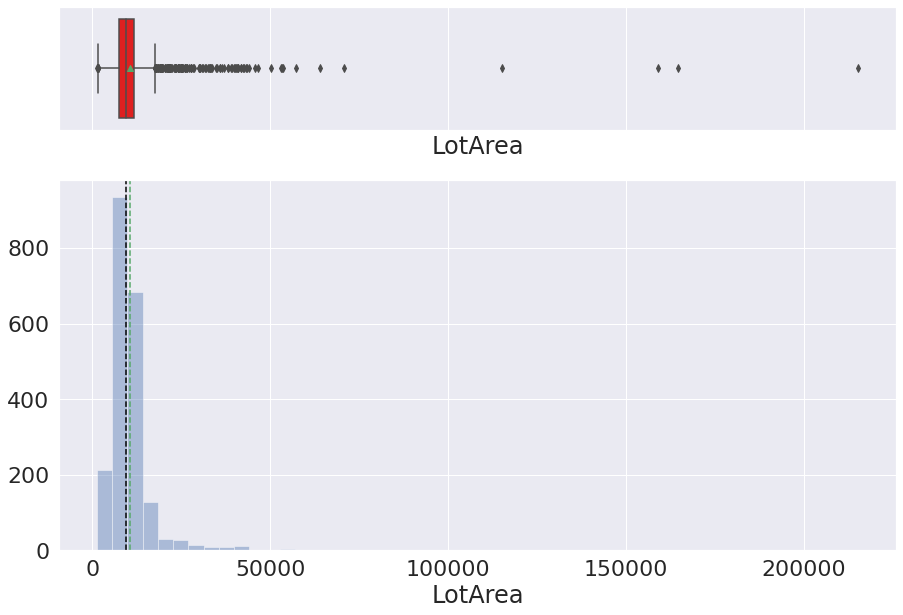

In [58]:
histogram_boxplot(a.LotArea)

# The mean > median so the data is right skewed 

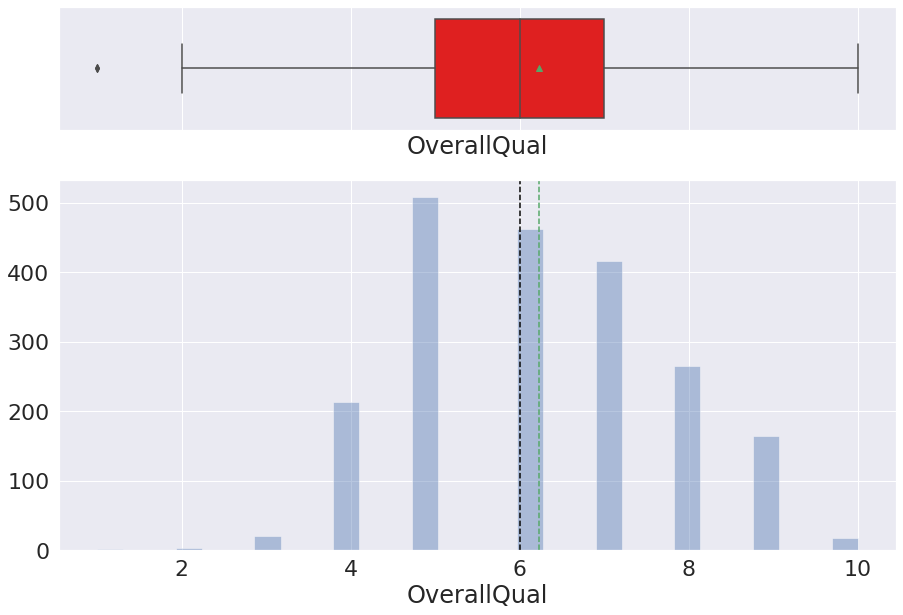

In [59]:
histogram_boxplot(a.OverallQual)

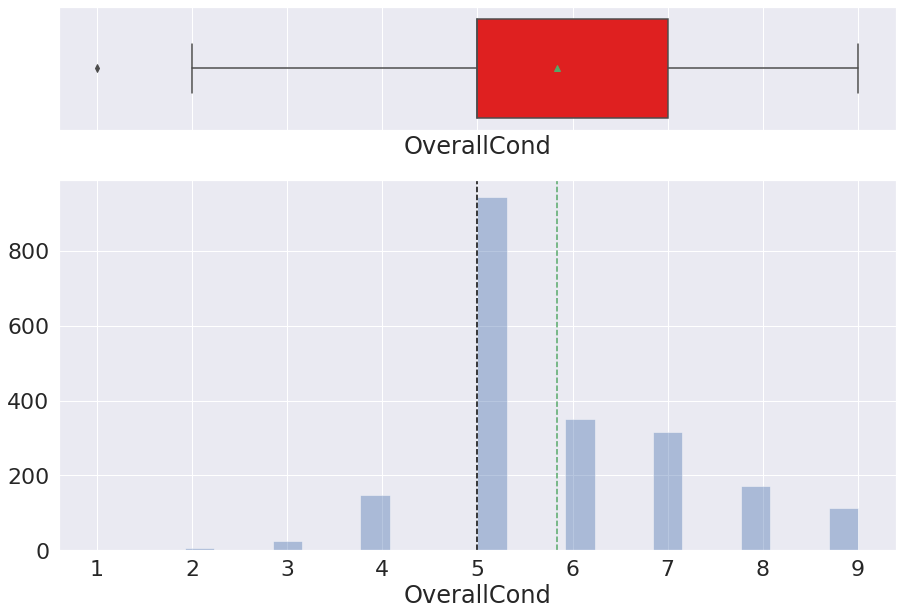

In [60]:
histogram_boxplot(a.OverallCond)

# The mean < median therefore the data is left skewed

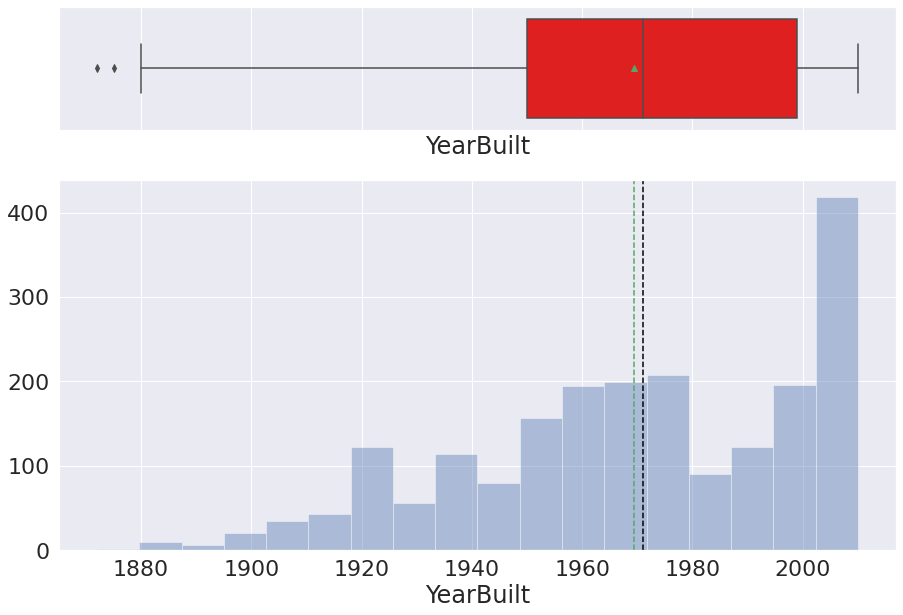

In [61]:
histogram_boxplot(a.YearBuilt)

# The mean < median so the data left skewed

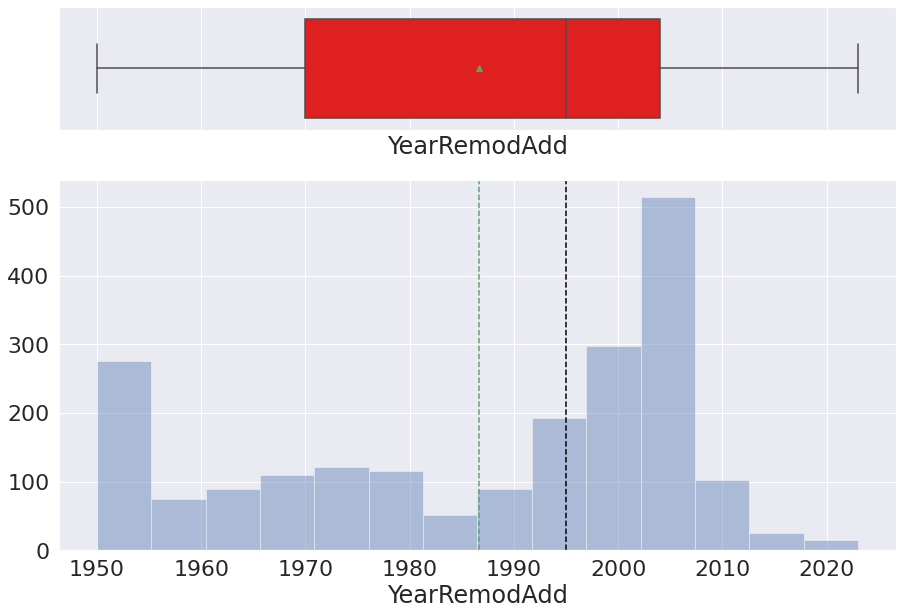

In [62]:
histogram_boxplot(a.YearRemodAdd)

#The data is clustered at the left side so we will try to normalize it.

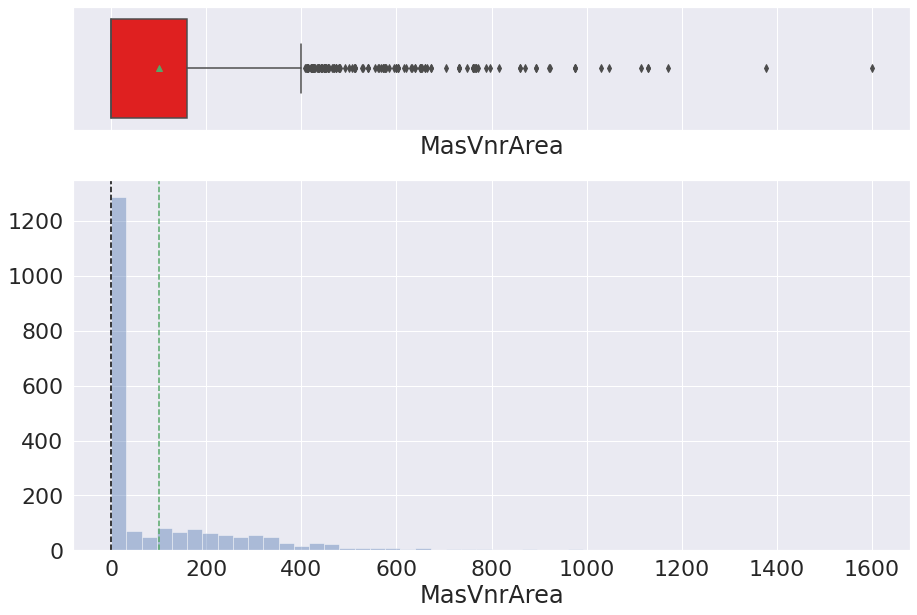

In [63]:
histogram_boxplot(a.MasVnrArea)

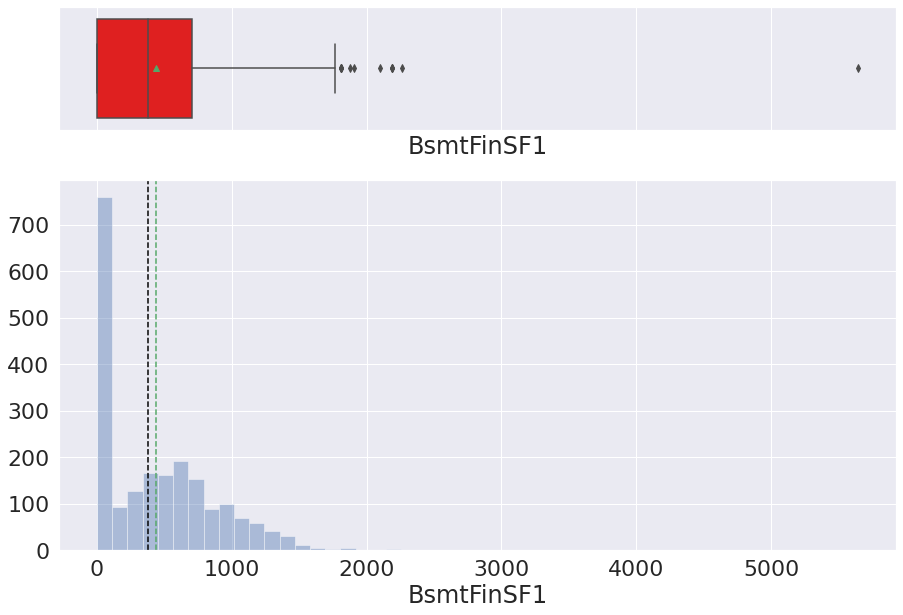

In [64]:
histogram_boxplot(a.BsmtFinSF1)


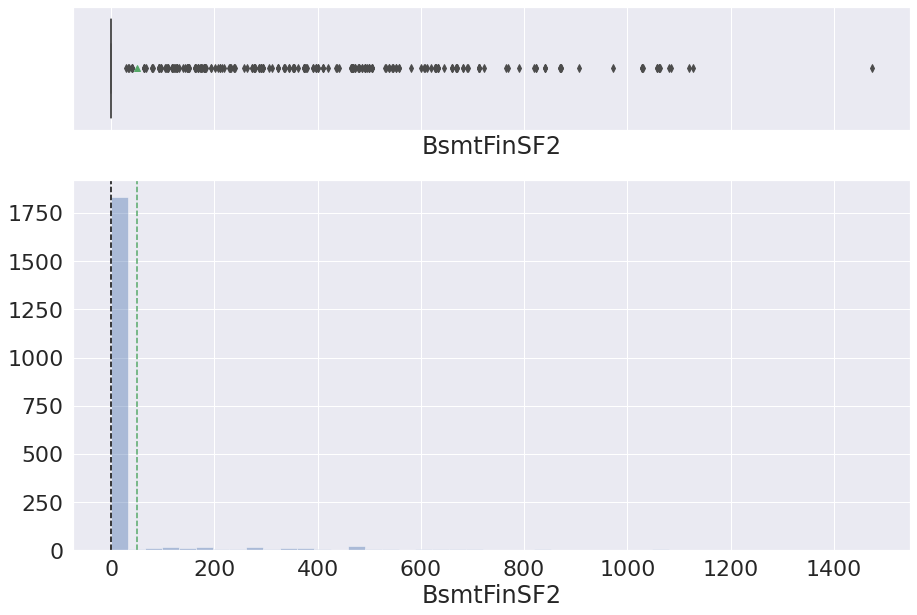

In [65]:
histogram_boxplot(a.BsmtFinSF2)

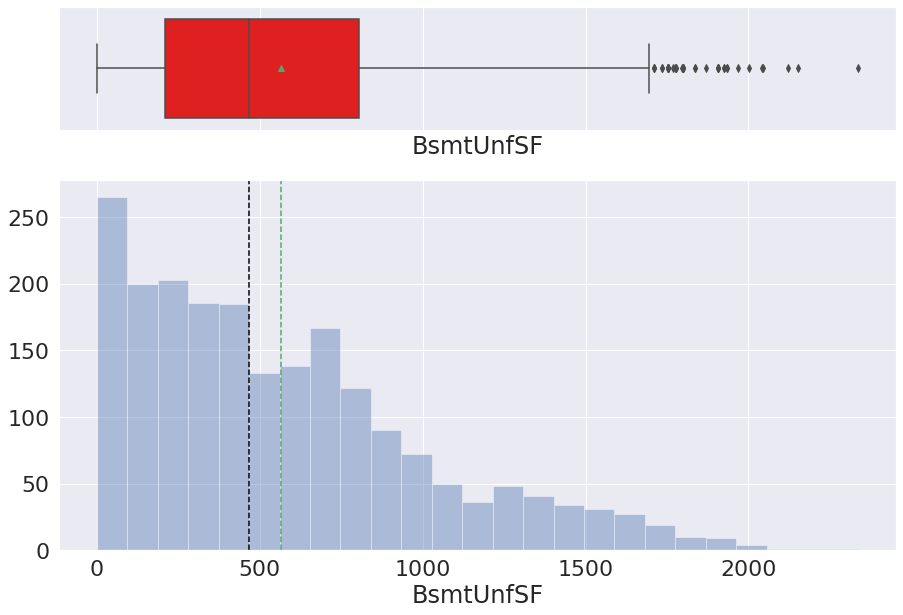

In [66]:
histogram_boxplot(a.BsmtUnfSF)

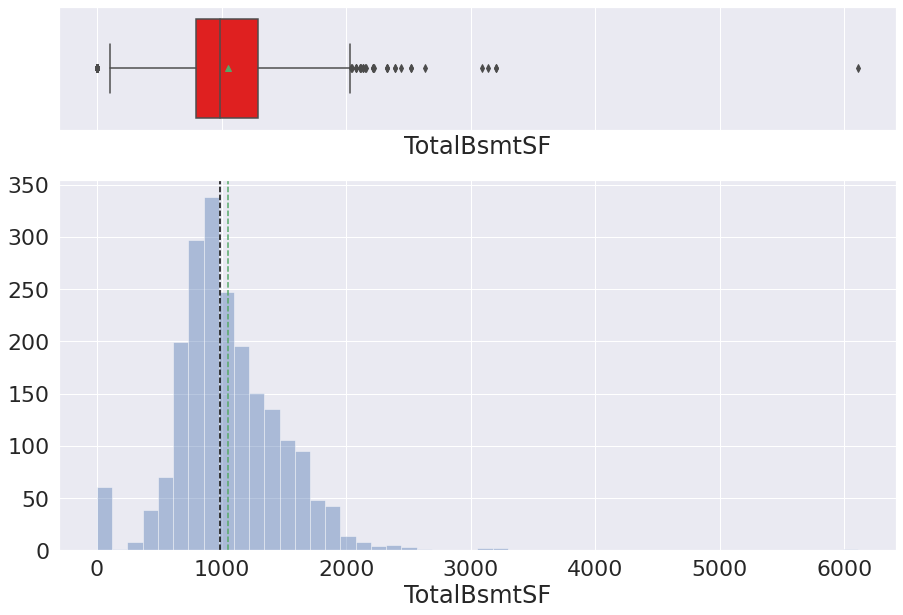

In [67]:
histogram_boxplot(a.TotalBsmtSF)

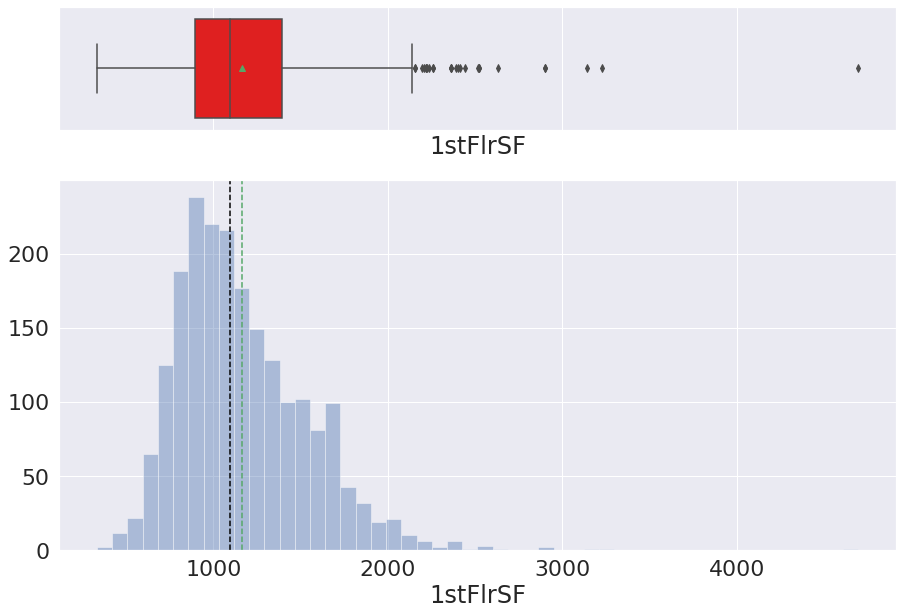

In [68]:
histogram_boxplot(a['1stFlrSF'])

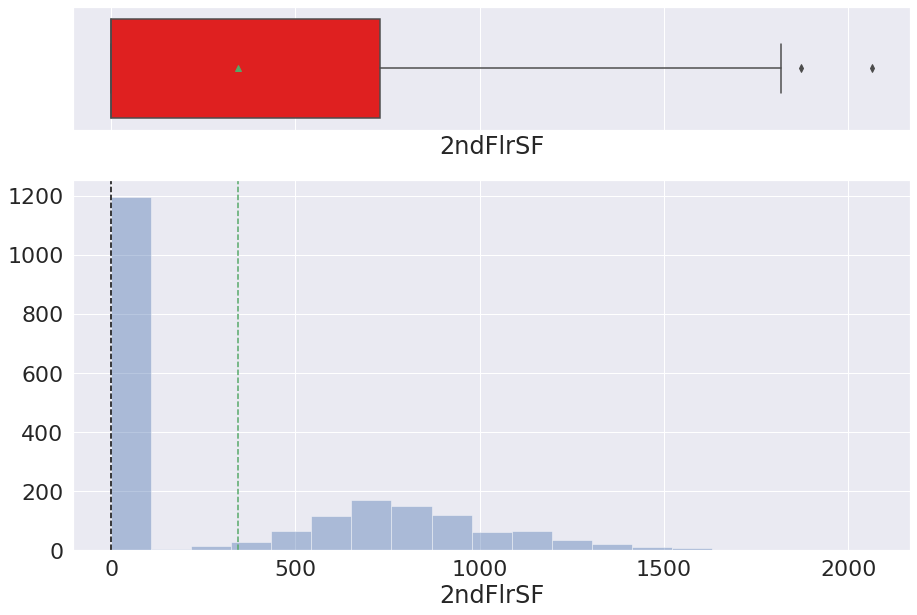

In [69]:
histogram_boxplot(a['2ndFlrSF'])

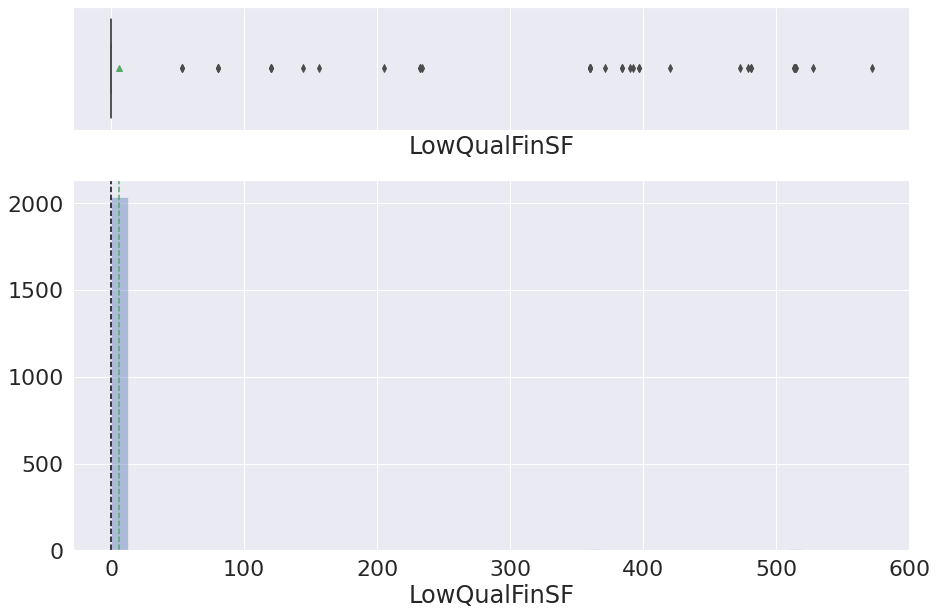

In [70]:
histogram_boxplot(a.LowQualFinSF)

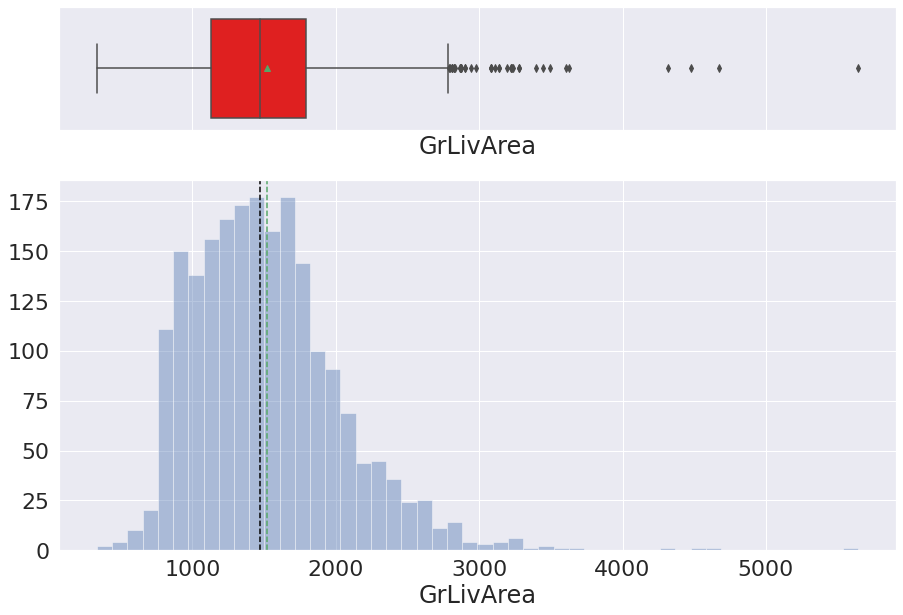

In [71]:
histogram_boxplot(a.GrLivArea)

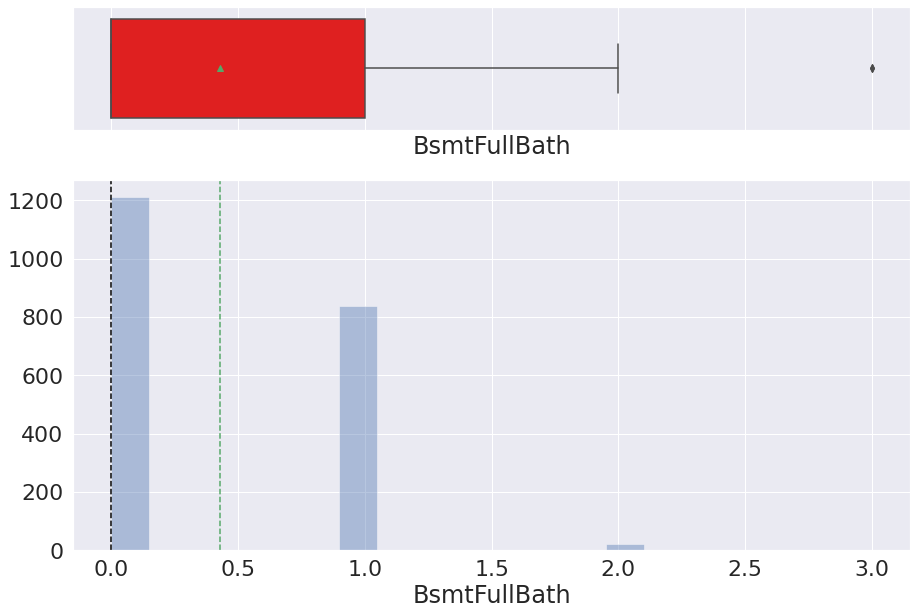

In [72]:
histogram_boxplot(a.BsmtFullBath)

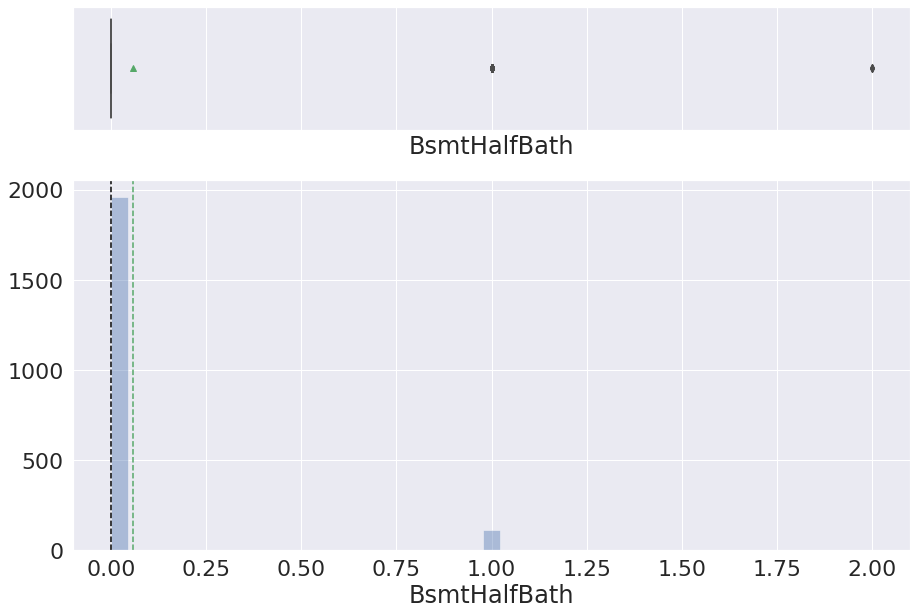

In [73]:
histogram_boxplot(a.BsmtHalfBath)

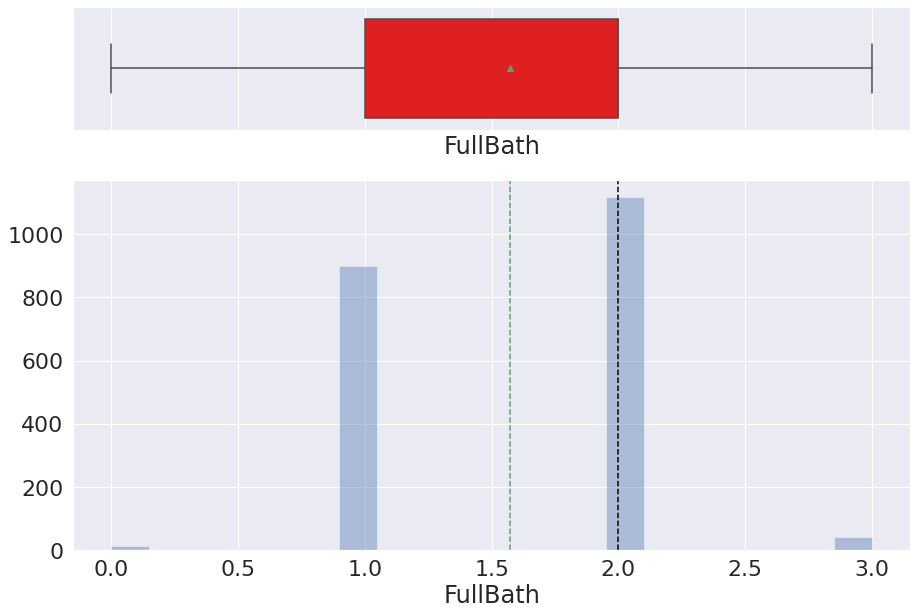

In [74]:
histogram_boxplot(a.FullBath)

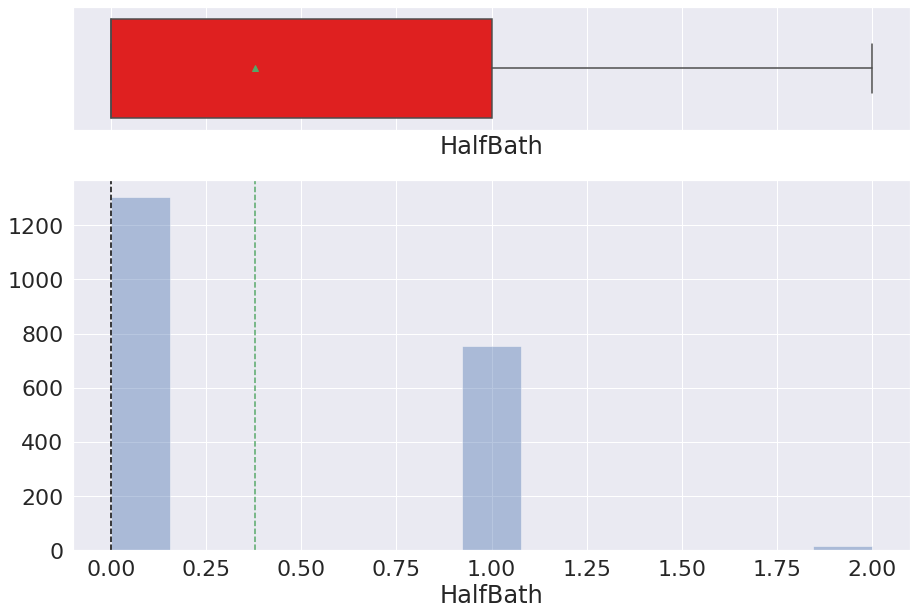

In [75]:
histogram_boxplot(a.HalfBath)

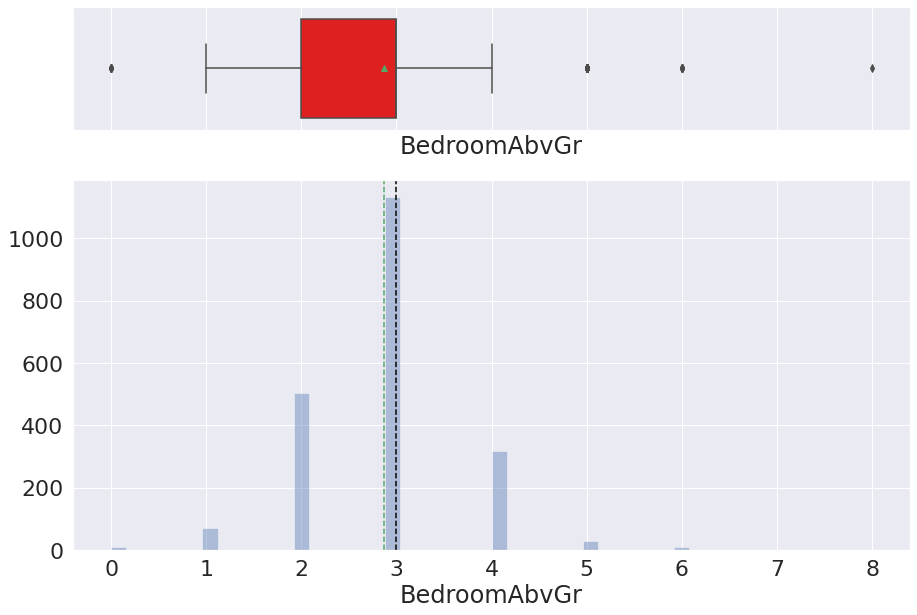

In [76]:
histogram_boxplot(a.BedroomAbvGr)

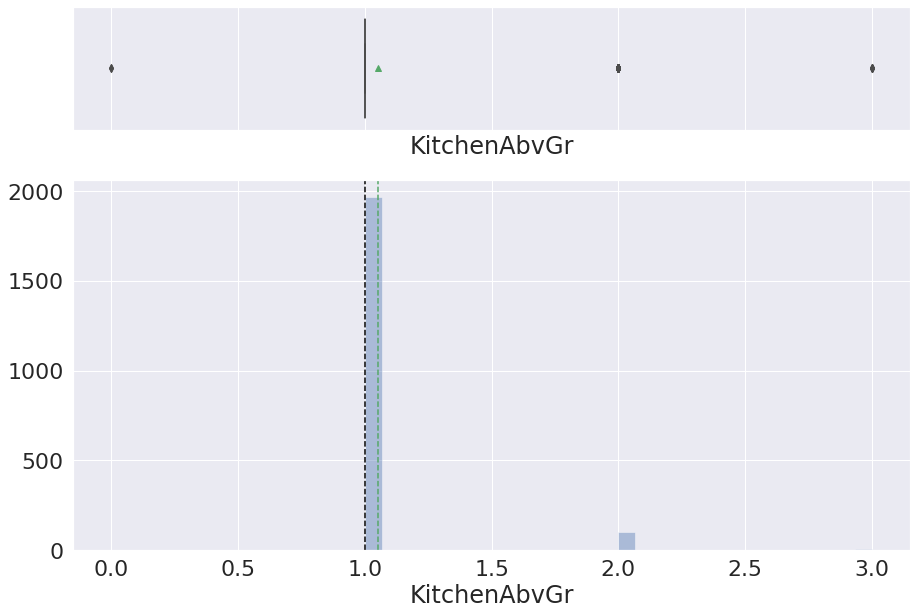

In [77]:
histogram_boxplot(a.KitchenAbvGr)

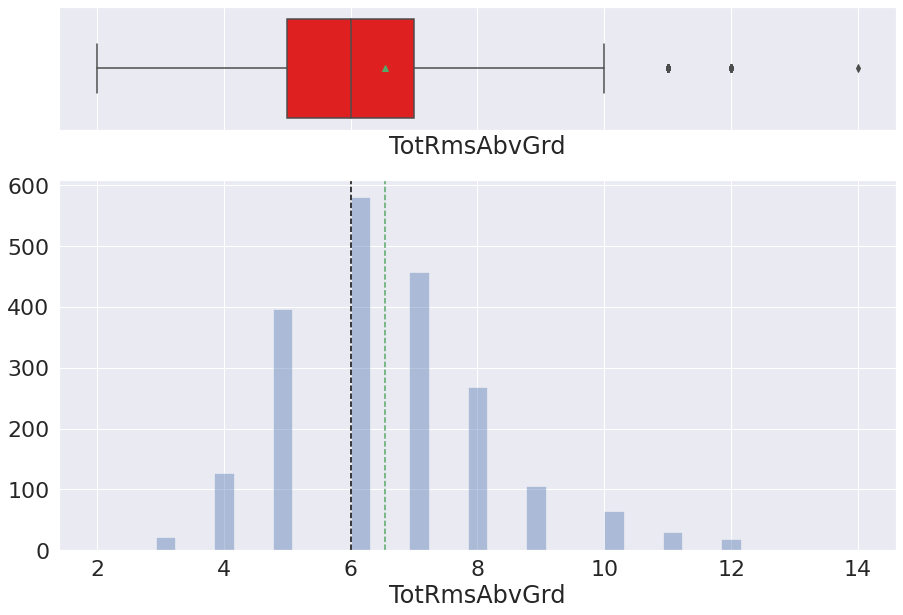

In [78]:
histogram_boxplot(a.TotRmsAbvGrd)

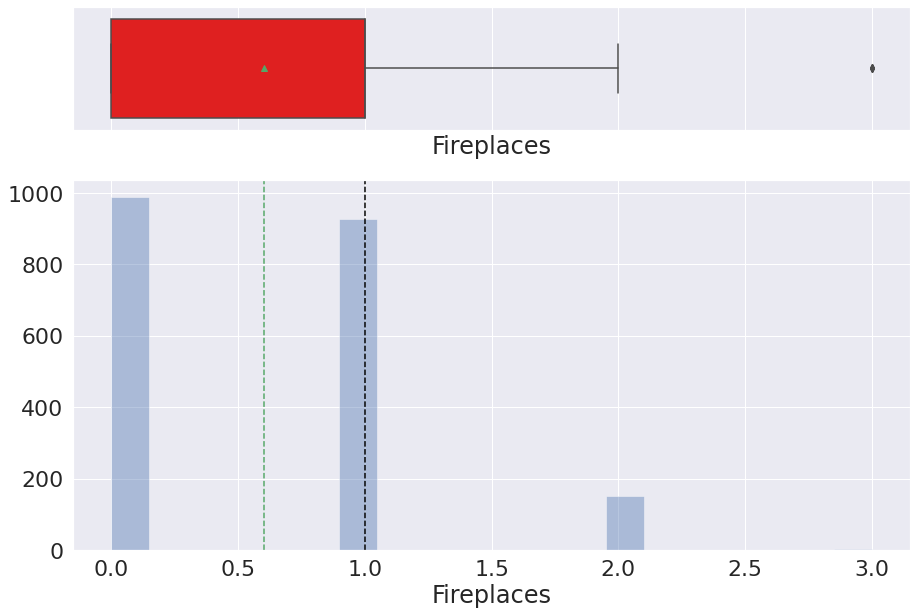

In [79]:
histogram_boxplot(a.Fireplaces)

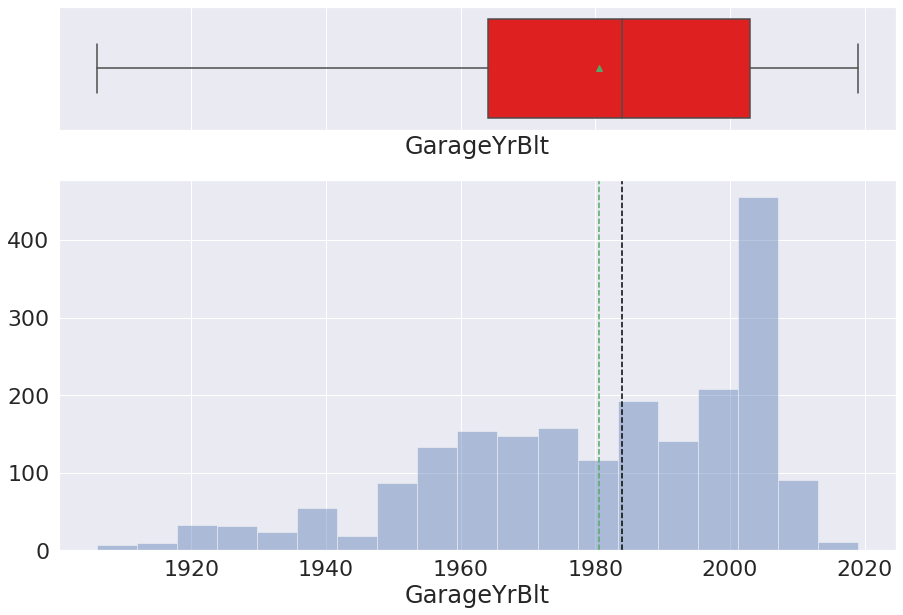

In [80]:
histogram_boxplot(a.GarageYrBlt)

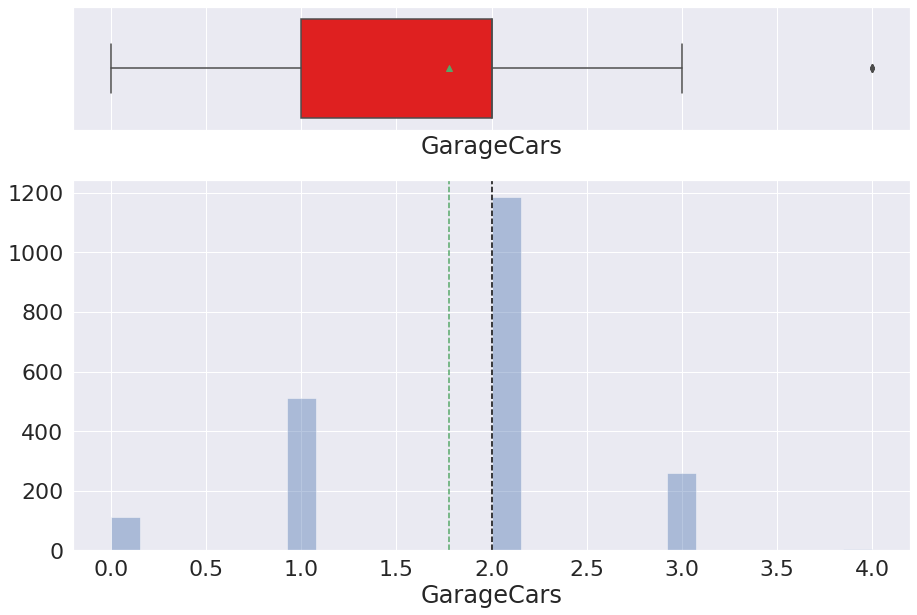

In [81]:
histogram_boxplot(a.GarageCars)

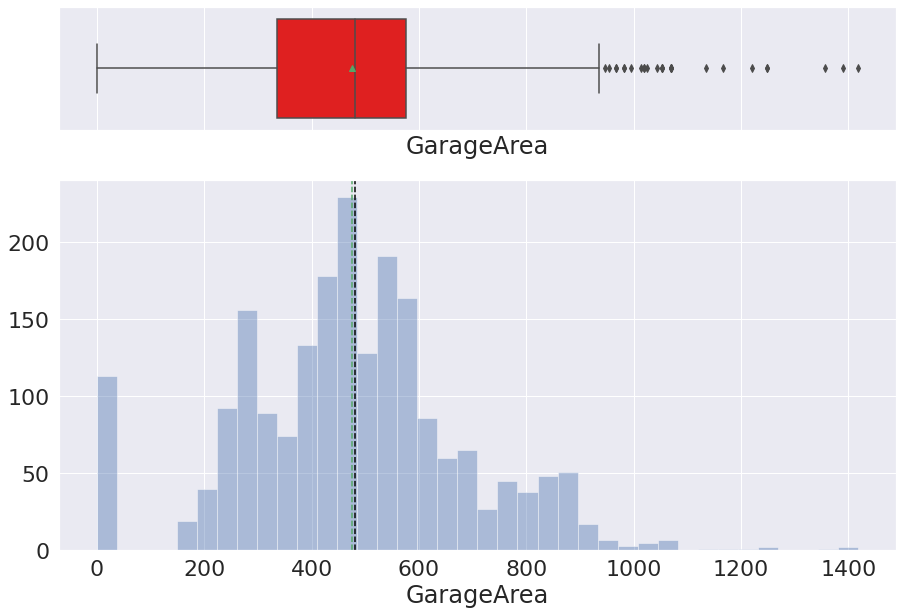

In [82]:
histogram_boxplot(a.GarageArea)

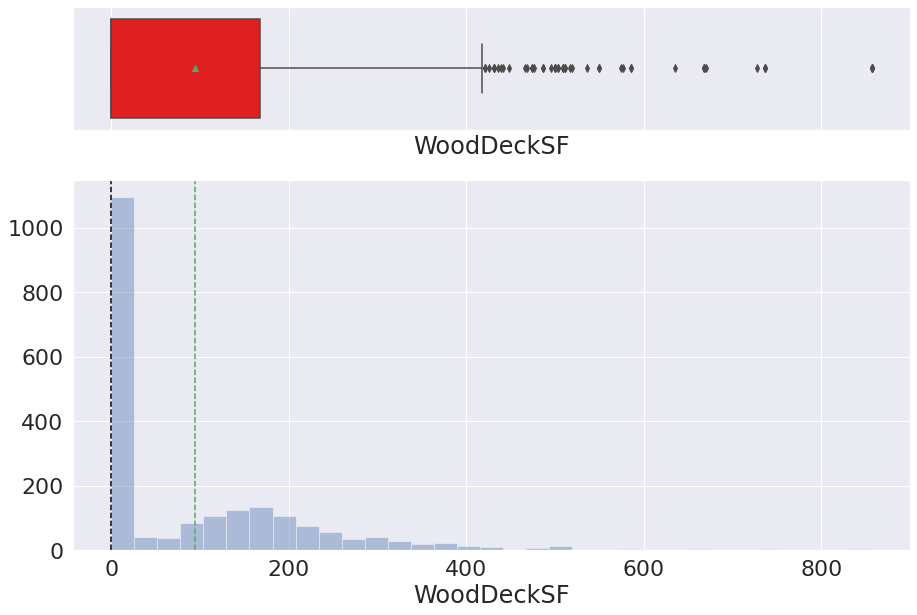

In [83]:
histogram_boxplot(a.WoodDeckSF)

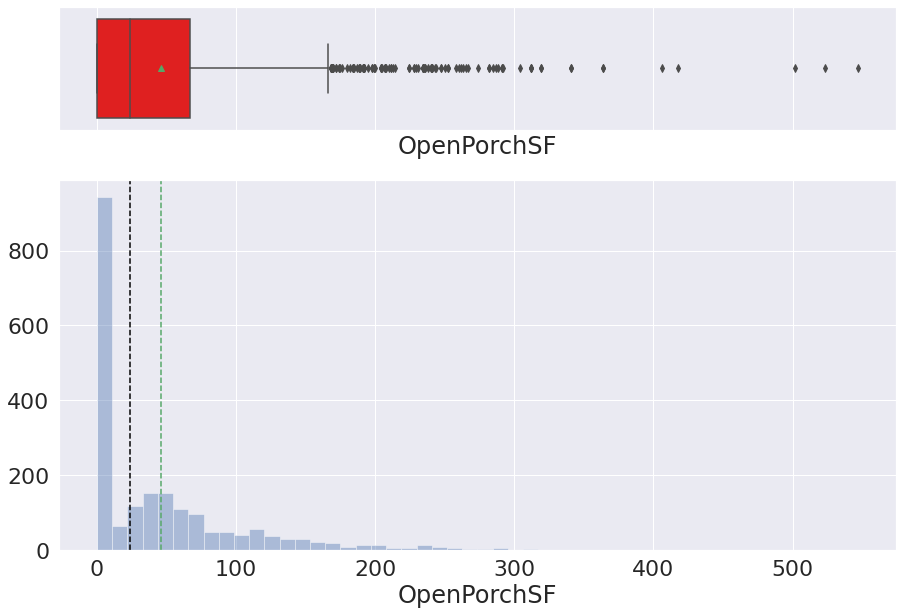

In [84]:
histogram_boxplot(a.OpenPorchSF)

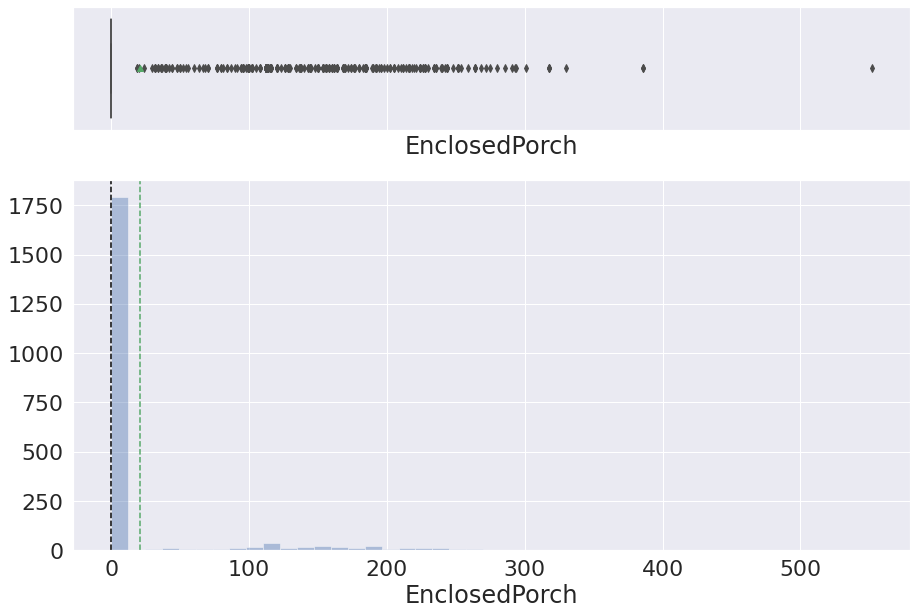

In [85]:
histogram_boxplot(a.EnclosedPorch)

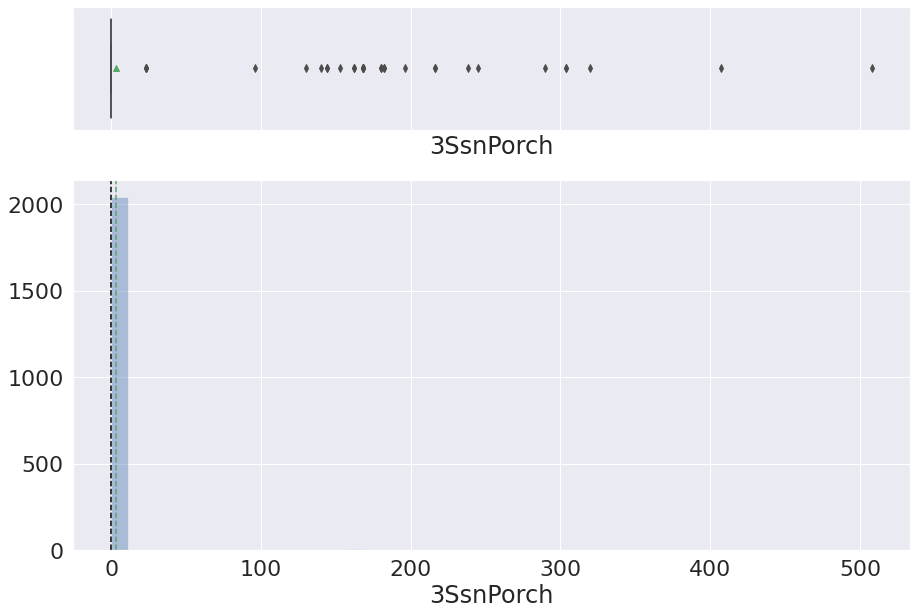

In [86]:
histogram_boxplot(a['3SsnPorch'])

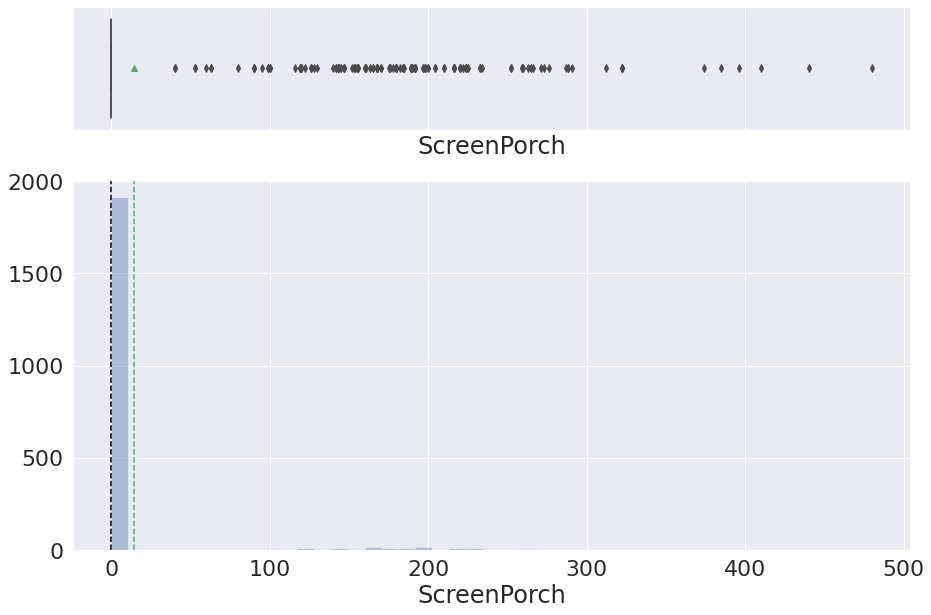

In [87]:
histogram_boxplot(a.ScreenPorch)

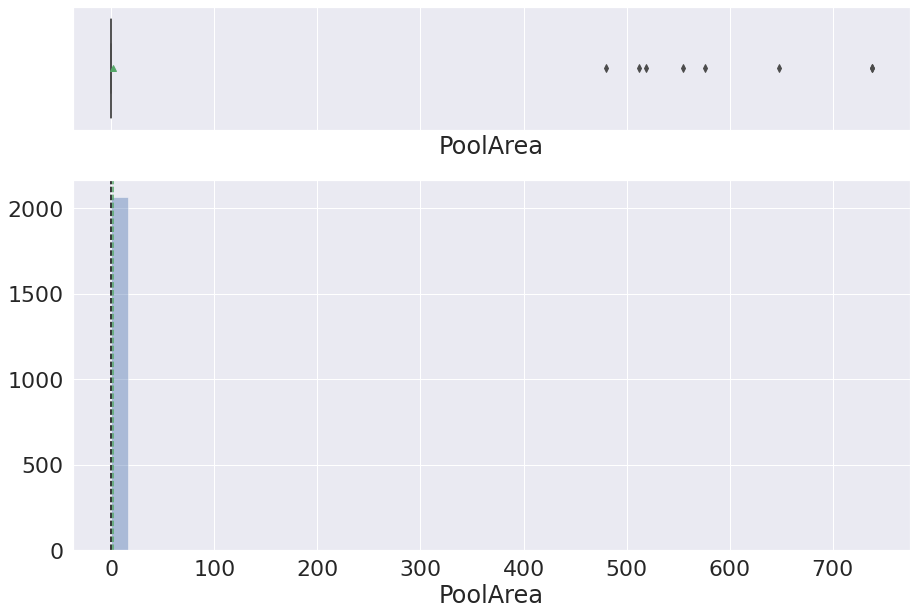

In [88]:
histogram_boxplot(a.PoolArea)

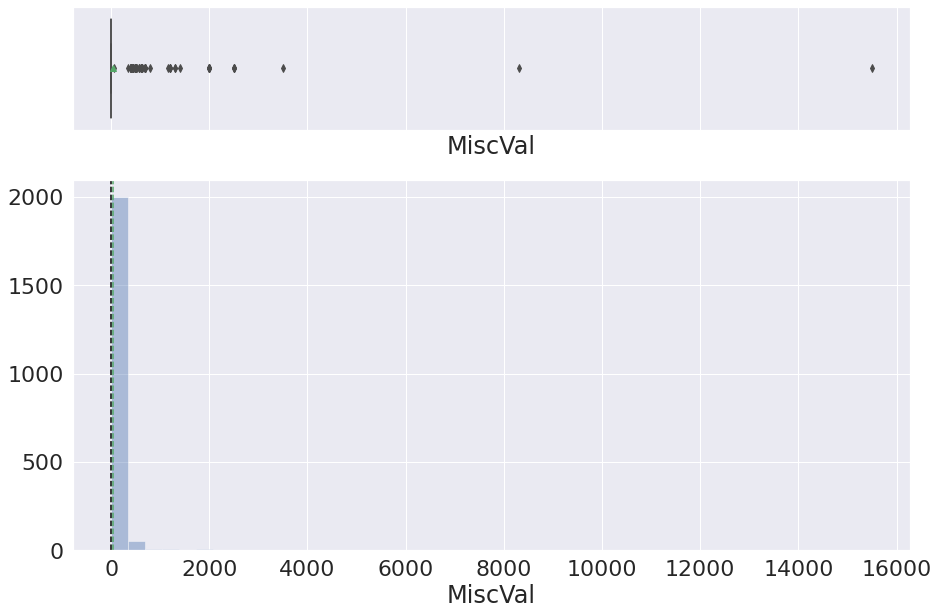

In [89]:
histogram_boxplot(a.MiscVal)

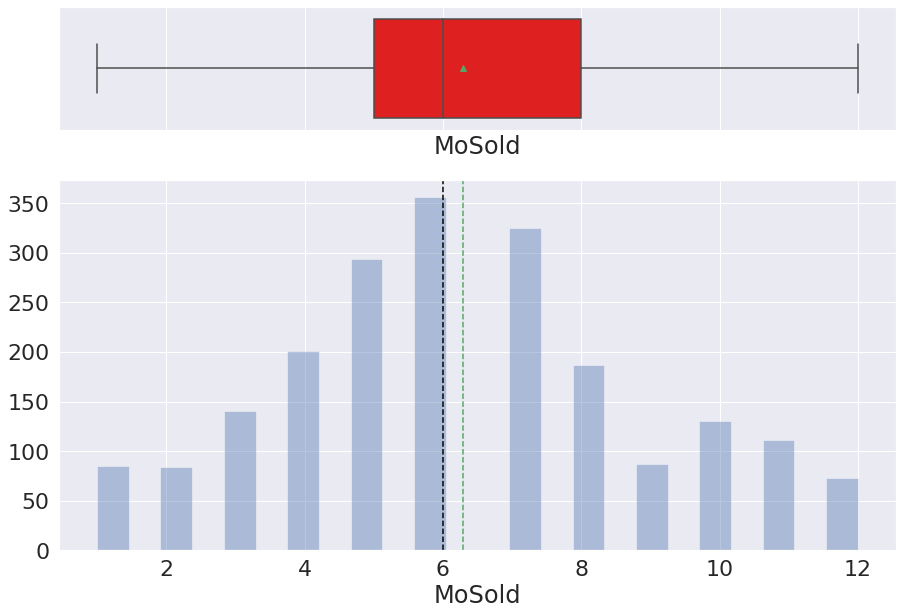

In [90]:
histogram_boxplot(a.MoSold)

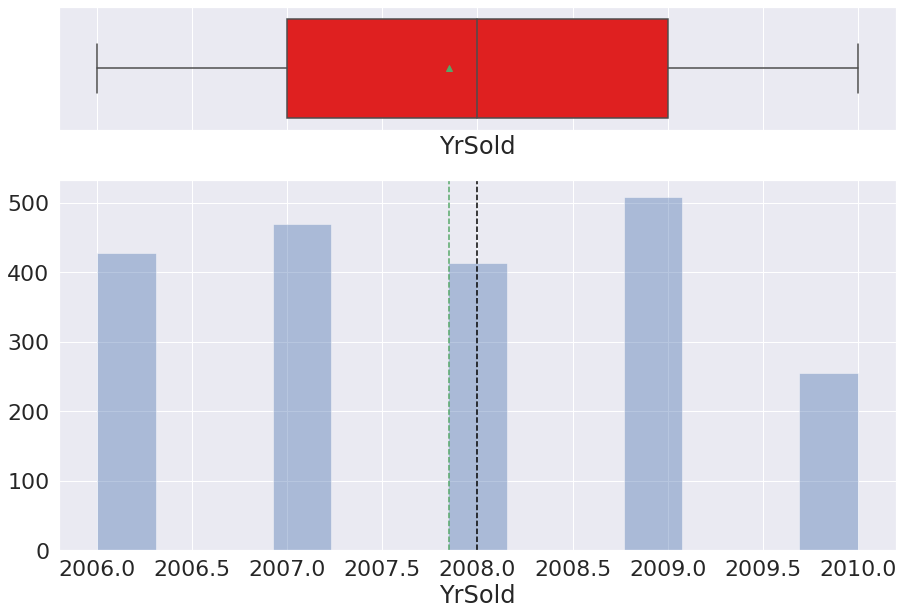

In [91]:
histogram_boxplot(a.YrSold)

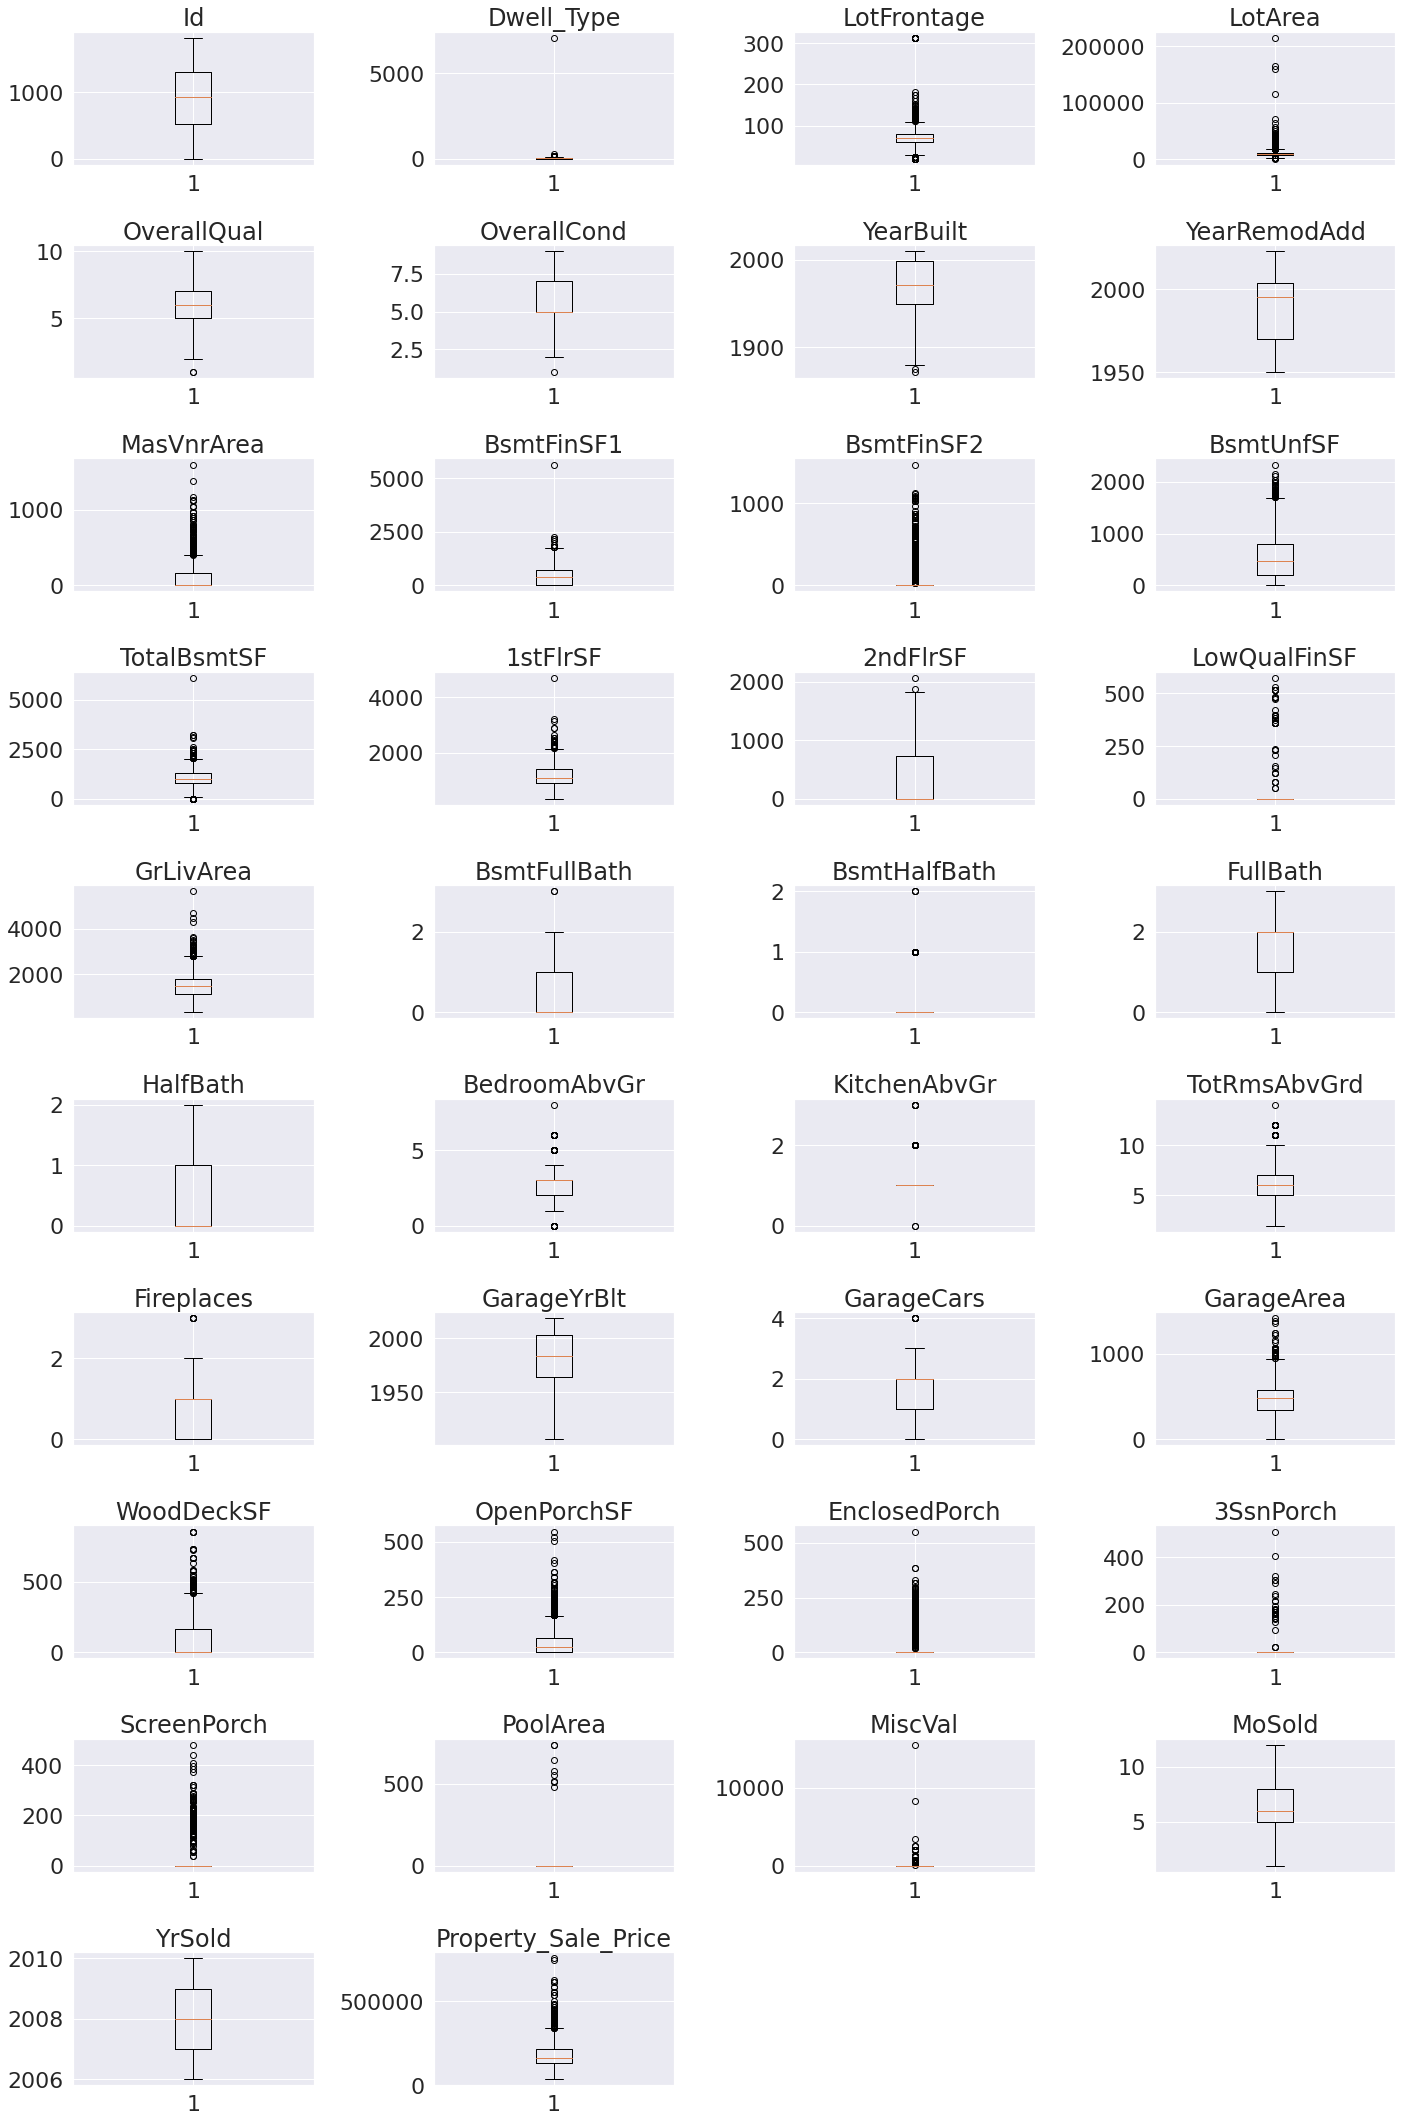

In [92]:
plt.figure(figsize=(20,30))
for i, variable in enumerate(numeric_columns):
  plt.subplot(10,4,i+1)
  plt.boxplot(a[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()                    

In [93]:
continous_data = ['Dwell_Type','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
                  'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt',
                  'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                  'MiscVal','Property_Sale_Price']

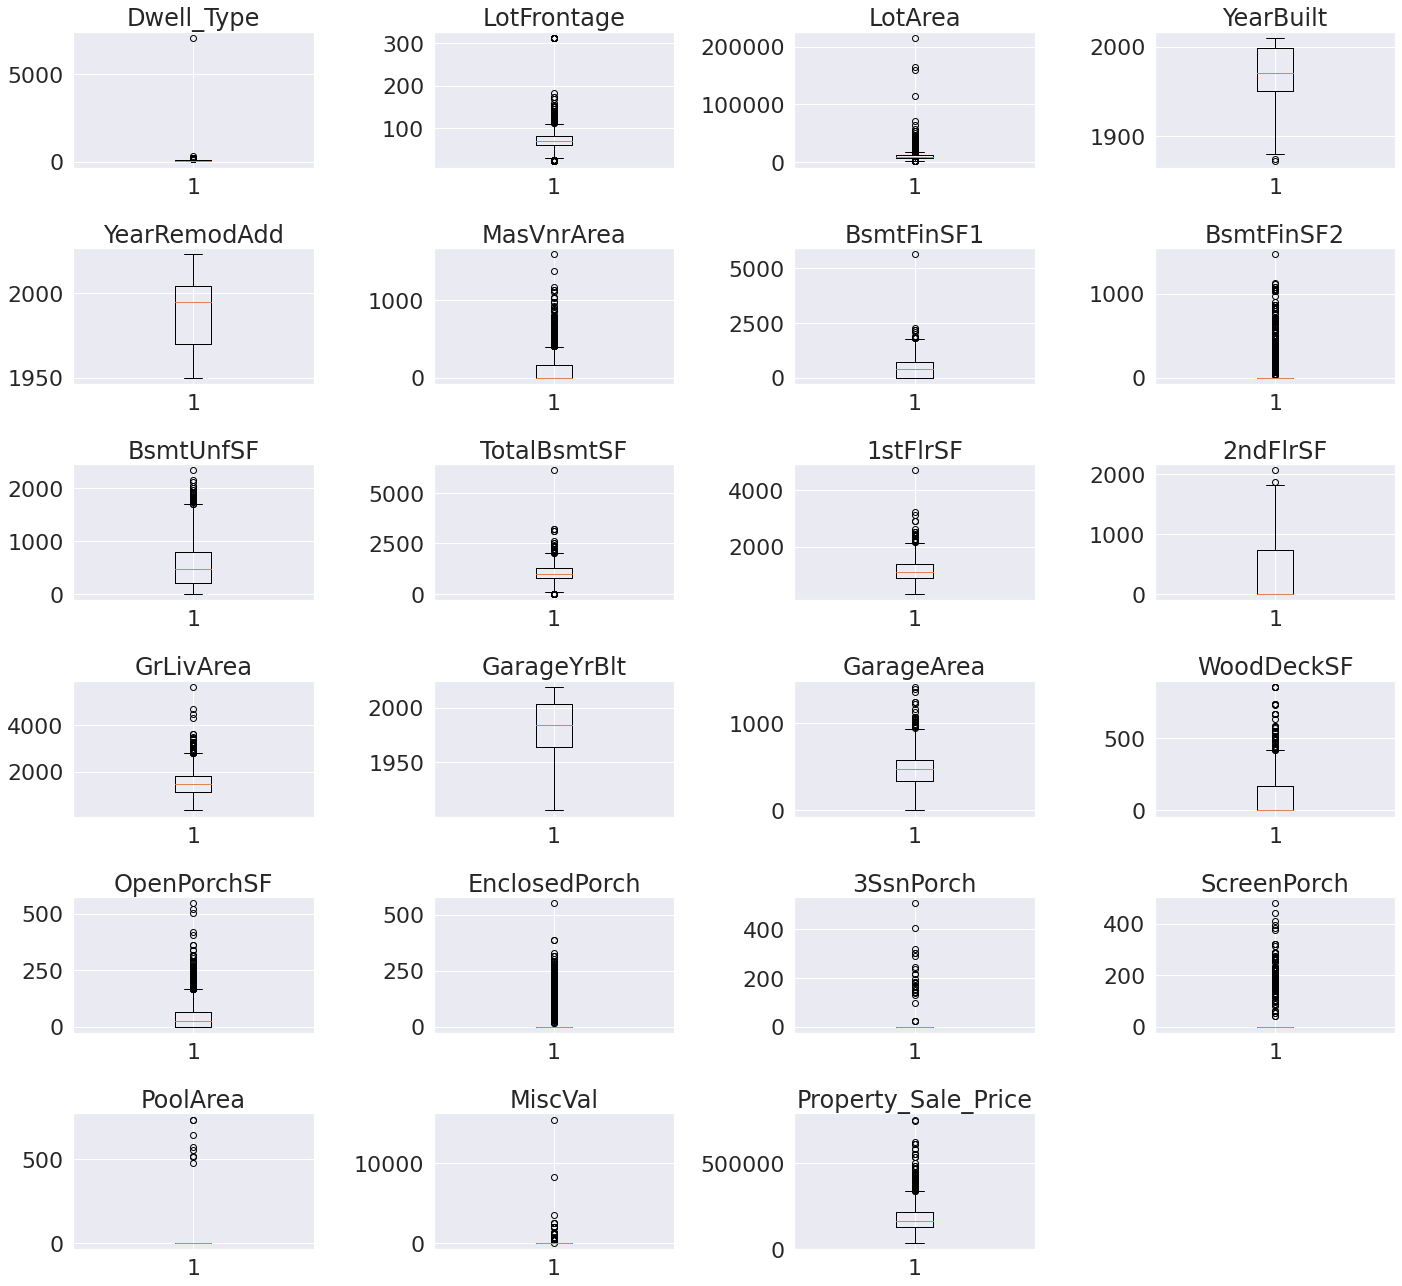

In [94]:
plt.figure(figsize=(20,30))
for i, variable in enumerate(continous_data):
  plt.subplot(10,4,i+1)
  plt.boxplot(a[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

In [95]:
dwell = a.Dwell_Type.to_list()
q1 = np.quantile(dwell,0.25)
q3 = np.quantile(dwell,0.75)
lower_whskr = q1 - 1.5*(q3-q1)
upper_whskr = q3 + 1.5*(q3-q1)
print(lower_whskr)
print(upper_whskr)

-55.0
145.0


In [96]:
a.Dwell_Type.clip(lower_whskr,upper_whskr)

0       60
1       20
2       60
3       70
4       60
        ..
2068    60
2069    90
2070    90
2071    20
2072    50
Name: Dwell_Type, Length: 2073, dtype: int64

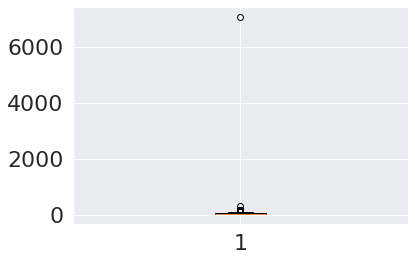

In [97]:
plt.boxplot(a['Dwell_Type'])
plt.show()

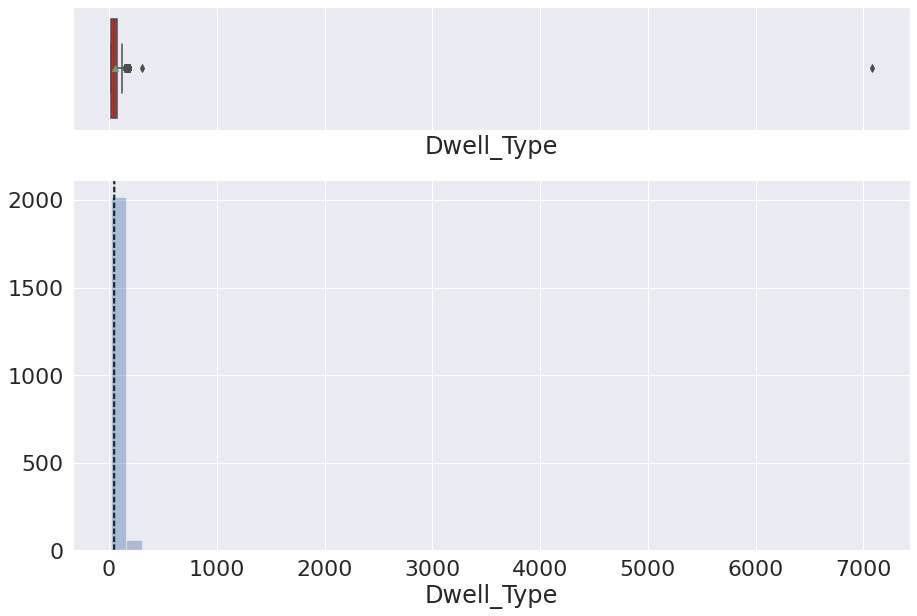

In [98]:
histogram_boxplot(a['Dwell_Type'])

In [99]:
print(a.var())
a["Log_Dwell_Type"] = np.log(a['Dwell_Type'])
print(a)

Id                        243063.465
Dwell_Type                 25575.945
LotFrontage                  662.878
LotArea                 84934329.873
OverallQual                    2.302
OverallCond                    1.850
YearBuilt                    913.408
YearRemodAdd                 417.495
MasVnrArea                 31954.358
BsmtFinSF1                200749.805
BsmtFinSF2                 27430.470
BsmtUnfSF                 202257.918
TotalBsmtSF               185783.789
1stFlrSF                  142110.240
2ndFlrSF                  192584.713
LowQualFinSF                2455.596
GrLivArea                 267533.523
BsmtFullBath                   0.273
BsmtHalfBath                   0.056
FullBath                       0.298
HalfBath                       0.250
BedroomAbvGr                   0.666
KitchenAbvGr                   0.057
TotRmsAbvGrd                   2.656
Fireplaces                     0.402
GarageYrBlt                  552.457
GarageCars                     0.551
G

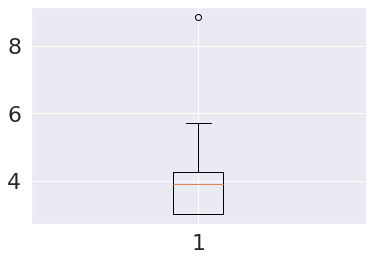

In [100]:
plt.boxplot(a['Log_Dwell_Type'])
plt.show()

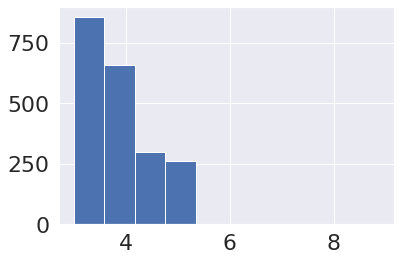

In [101]:
plt.hist(a['Log_Dwell_Type'])
plt.show()

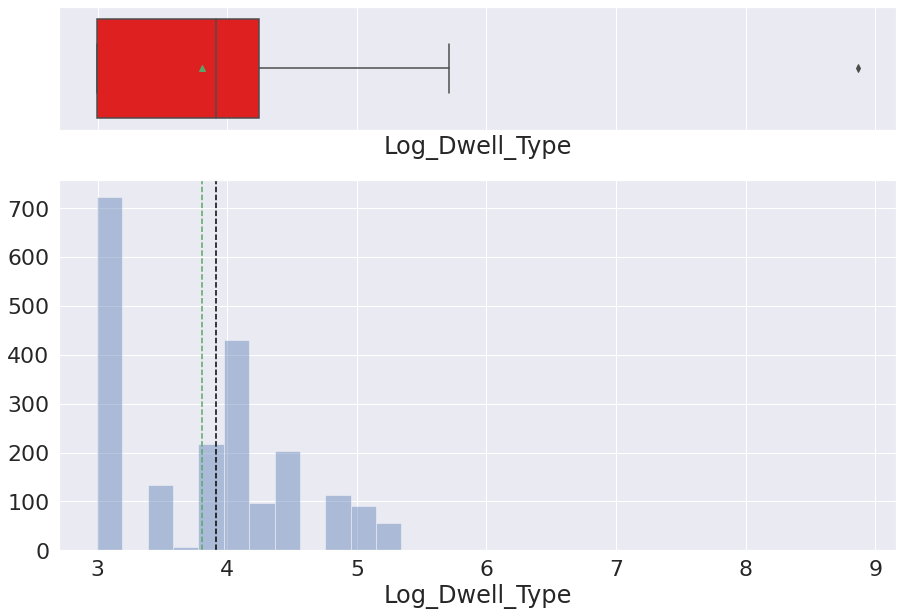

In [102]:
histogram_boxplot(a['Log_Dwell_Type'])

In [103]:
a['Log_Dwell_Type'].describe()

count   2073.000
mean       3.803
std        0.707
min        2.996
25%        2.996
50%        3.912
75%        4.248
max        8.865
Name: Log_Dwell_Type, dtype: float64

In [104]:
a['Dwell_Type'].describe()

count   2073.000
mean      60.556
std      159.925
min       20.000
25%       20.000
50%       50.000
75%       70.000
max     7080.000
Name: Dwell_Type, dtype: float64

In [105]:
LotFrontage = a.LotFrontage.to_list()
q1 = np.quantile(LotFrontage,0.25)
q3 = np.quantile(LotFrontage,0.75)
lower_whskr = q1 - 1.5*(q3-q1)
upper_whskr = q3 + 1.5*(q3-q1)
print(lower_whskr)
print(upper_whskr)

30.0
110.0


In [106]:
a.LotFrontage.clip(30,110)

0       65.000
1       80.000
2       68.000
3       60.000
4       84.000
         ...  
2068    70.000
2069    63.000
2070   110.000
2071    52.000
2072    98.000
Name: LotFrontage, Length: 2073, dtype: float64

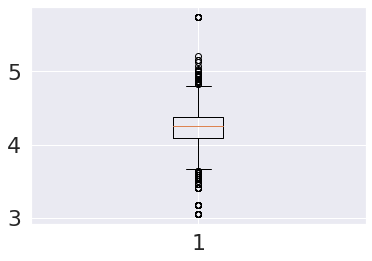

In [107]:
a["Log_LotFrontage"] = np.log(a['LotFrontage'])
plt.boxplot(a['Log_LotFrontage'])
plt.show()

In [108]:
def outliers(name):
  z = name.to_list()
  q1 = np.quantile(z,0.25)
  q3 = np.quantile(z,0.75)
  IQR = q3 - q1
  z[name]=np.clip(z[name],q1-1.5*IQR,q3+1.5*IQR)
  lower = q1 - 1.5 * IQR
  upper = q3 + 1.5 * IQR
  return lower,upper

In [109]:
outliers(z["Dwell_Type"])
plt.boxplot(z["Dwell_Type"])


NameError: ignored

In [ ]:
Numeric_columns = ['Dwell_Type','YearBuilt']
#define function for adding outliers into whisker
def LRwhisker(continous_data):
    q1=a[continous_data].quantile(0.25)
    q3=a[continous_data].quantile(0.75)
    IQR=q3-q1
    a[continous_data]=np.clip(a[continous_data],q1-1.5*IQR,q3+1.5*IQR)
    return a[continous_data]
for i in numeric_columns:
  LRwhisker(i)    
   
def normalize (continous_data):
    a[continous_data]=(a[continous_data]-a[continous_data].mean())/ a[continous_data].std()
    a[continous_data]=np.log1p(a[continous_data])
   
    return a[continous_data]

In [ ]:
LRwhisker('YearBuilt')

In [ ]:
plt.boxplot(a['YearBuilt'])
plt.show()

In [ ]:
normalize('YearBuilt')
sns.displot(a['YearBuilt'])
plt.show()

In [ ]:
normalize('LotArea')
sns.displot(a['LotArea'])
plt.show()

In [ ]:
plt.figure(figsize=(20,30))
for i, variable in enumerate(continous_data):
  plt.subplot(10,4,i+1)
  plt.boxplot(a[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

In [ ]:
plt.figure(figsize=(20,30))
for i, variable in enumerate(continous_data):
  plt.subplot(10,4,i+1)
  sns.distplot(a[variable])
  plt.tight_layout()
  plt.title(variable)
plt.show()

# Function to create barplots that indicate percentage or each category

In [ ]:
def perc_on_bar(plot, feature):
  '''
  plot
  feature: categorical feature
  the function won't work if a passed in hue parameter
  '''
  total = len(feature) # length of the column
  for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) # perentage of each class of the category
    x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y = p.get_y() + p.get_height()           # height of the plot
    ax.annotate(percentage, (x, y), size = 12)# annotate the percentage
  plt.show() # show the plot)    

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(a["Zone_Class"],palette='winter')
perc_on_bar(ax,a['Zone_Class'])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(a["Road_Type"],palette='winter')
perc_on_bar(ax,a['Road_Type'])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(a["Property_Shape"],palette='winter')
perc_on_bar(ax,a['Property_Shape'])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(a["LandContour"],palette='winter')
perc_on_bar(ax,a['LandContour'])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(a["Utilities"],palette='winter')
perc_on_bar(ax,a['Utilities'])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(a["LotConfig"],palette='winter')
perc_on_bar(ax,a["LotConfig"])

In [ ]:
a['Neighborhood'].replace({'IDOTRR':'Blueste','MeadowV':'Blueste','BrDale':'Blueste','OldTown':'Blueste','BrkSide':'Blueste','Edwards':'Blueste'},inplace=True)
a['Neighborhood'].replace({'Sawyer':'SawyerW','SWISU':'SawyerW','NPkVill':'SawyerW','NAmes':'SawyerW','Mitchel':'SawyerW'},inplace=True)
a['Neighborhood'].replace({'Blmngtn':'NridgH','Gilbert':'NridgH','NWAmes':'NridgH','CollgCr':'NridgH','Crawfor':'NridgH','ClearCr':'NridgH','Somerst':'NridgH','Timber':'NridgH','Veenker':'NridgH','StoneBr':'NridgH','NoRidge':'NridgH'},inplace=True)
a['Neighborhood'].value_counts()

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(a["LandSlope"],palette='winter')
perc_on_bar(ax,a["LandSlope"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(a["Neighborhood"],palette='winter',)
perc_on_bar(ax,a["Neighborhood"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(a["Condition1"],palette='winter')
perc_on_bar(ax,a["Condition2"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(a["Dwelling_Type"],palette='winter')
perc_on_bar(ax,a["Dwelling_Type"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(a["HouseStyle"],palette='winter')
perc_on_bar(ax,a["HouseStyle"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(a["RoofStyle"],palette='winter')
perc_on_bar(ax,a["RoofStyle"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(a["RoofMatl"],palette='winter')
perc_on_bar(ax,a["RoofMatl"])

In [ ]:
plt.figure(figsize=(22,5))
ax = sns.countplot(a["Exterior1st"],palette='winter')
perc_on_bar(ax,a["Exterior1st"])

In [ ]:
plt.figure(figsize=(22,5))
ax = sns.countplot(a["Exterior2nd"],palette='winter')
perc_on_bar(ax,a["Exterrior2nd"])

In [ ]:
for i in categorical_column:
  plt.figure(figsize=(15,5))
  ax = sns.countplot(a[i],palette='winter')
  perc_on_bar(ax,a[i])

In [ ]:
corr = a[numeric_columns].corr().sort_values(by=['Property_Sale_Price'], ascending=False) # sorting correlation
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (45, 25))
# Draw the heatmap with and correct aspect ratio
sns.heatmap(corr,
            cmap = 'seismic', annot = True,fmt=".1f", vmin=-1,vmax=1,center=0,
            square = False, linewidths = .7, cbar_kws = {'shrink':.5});